# Current version : 6.10.a (2024-11-13)

# Libraries and directory (always run)

In [1]:
### import necessary libraries
import anndata as ad
import anndata
import csv
from datetime import datetime
import geojson
import geopandas as gpd
from IPython.display import display
import matplotlib as mpl
from matplotlib import animation
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import networkx as nx
import numpy as np
import os
import pandas as pd
import pickle
import random
import re
import seaborn as sns
import scanpy as sc
import scanpy.external as sce
from scipy import stats
from scipy.interpolate import CubicSpline
from scipy.io import mmread
from scipy.optimize import curve_fit
import scipy.sparse as sparse
from scipy.stats import pearsonr, pointbiserialr
from shapely.geometry import Polygon, mapping, MultiPolygon
from shapely.ops import unary_union
from skimage import measure
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore") 
sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 1 # errors (0), warnings (1), info (2), hints (3)
plt.rcParams["font.family"] = "Arial"
sns.set_style("white")

# Note that BANKSY itself is deterministic, here the seeds affect the umap clusters and leiden partition
seed = 1234
np.random.seed(seed)
random.seed(seed)

start_time = datetime.now()

def print_with_elapsed_time(message):
    elapsed_time = datetime.now() - start_time
    elapsed_seconds = elapsed_time.total_seconds()
    print(f"[{elapsed_seconds:.2f} seconds] {message}")

scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.6 pynndescent==0.5.10


In [2]:
print(f"geopandas version: {gpd.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"scanpy version: {sc.__version__}")

geopandas version: 0.14.4
pandas version: 2.1.1
scanpy version: 1.9.5


In [3]:
### Directory where the data is stored

# dir = "/mnt/d/Xenium" #Ubuntu
# dir = "/media/volume/data/spatial/hugo/data" #Ubuntu
dir = "/media/volume/data/spatial/hugo/data/k5" #Ubuntu
dir = '/media/volume/volume_spatial/hugo/data/test'
dir = '/media/volume/volume_spatial/hugo/data'

# dir_notebook = '/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook'
# dir_notebook = '/media/volume/data/spatial/hugo/notebook'
dir_notebook = '/media/volume/volume_spatial/hugo/notebook'


In [7]:
# # # # ### HC ###

# # # # ### make a list of samples and their ids to make the cell names unique
# # # # #samples = ["2505-1__20240404__003359", "2505-2__20240404__003359", "2670-1__20240404__003359", "3159-1__20240321__212855", "3160-1__20240321__212855", "3160-2__20240321__212855"]
# # # # #samples_ids = ["2505-1", "2505-2", "2670-1", "3159-1", "3160-1", "3160-2"]
# # # # #name_dir = 'run1-2'

# # # # # ### Run 1 resegmented
# # # # samples = ["2505-1_subsampled", "2505-2_subsampled", "2670-1_subsampled", 
# # # #    "3159-1_subsampled"
# # # #     , "3160-1_subsampled", "3160-2_subsampled"]
# # # # samples_ids = ["2505-1", "2505-2", "2670-1", 
# # # #               "3159-1", "3160-1", "3160-2"       ]
# # # # name_dir = 'run1-resegment'

# # # # # # #Run 3
# # # # # samples = ["3159-2__20240530__205547", "3159-3__20240530__205547", "3159-4__20240530__205547", "3161-1__20240530__205547", "3161-2__20240530__205547", "3161-3__20240530__205547"]
# # # # # samples_ids = ["3159-2", "3159-3", "3159-4", "3161-1", "3161-2", "3161-3"]
# # # # # name_dir = 'run3-all'

# # # # # Run 3 Habenula
# # # samples = ["3159-2__20240530__205547", "3161-1__20240530__205547"]
# # # samples_ids = ["3159-2", "3161-1"]
# # # name_dir = 'run3-Habenula'

# # # # # # # Run 3 LGN
# # # # samples = ["3159-3__20240530__205547", "3161-2__20240530__205547"]
# # # # samples_ids = ["3159-3","3161-2"]
# # # # name_dir = 'run3-LGN'

# # # # # #Run 3 SC
# # # samples = ["3159-4__20240530__205547","3161-3__20240530__205547"]
# # # samples_ids = ["3159-4", "3161-3"]
# # # name_dir = 'run3-SC'

# # # # # samples = ["Xenium_Prime_Mouse_Brain_Coronal_FF_outs"]
# # # # # samples_ids = ['Xenium_Prime']
# # # # # name_dir = 'test-prime'

# # # # # # circa1
# # samples = ['circa1_ZT1','circa1_ZT5','circa1_ZT9','circa1_ZT13','circa1_ZT17','circa1_ZT21']
# # samples_ids = ['circa1-ZT1','circa1-ZT5','circa1-ZT9','circa1-ZT13','circa1-ZT17','circa1-ZT21',]
# # name_dir = 'circa1'

# # # ### circa2_
# samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21']
# samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',]
# name_dir = 'circa2'

# # ### circa3_
# samples = ['circa3-ZT01','circa3-ZT05','circa3-ZT09','circa3-ZT13','circa3-ZT17','circa3-ZT21']
# samples_ids = ['circa3-ZT01','circa3-ZT05','circa3-ZT09','circa3-ZT13','circa3-ZT17','circa3-ZT21',]
# name_dir = 'circa3'

# ### circa4-Salk
# samples = ['circa4-Salk-ZT01',
#            'circa4-Salk-ZT05','circa4-Salk-ZT09','circa4-Salk-ZT13','circa4-Salk-ZT17',
#            'circa4-Salk-ZT21',]
# samples_ids = ['circa4-Salk-ZT01',
#                'circa4-Salk-ZT05','circa4-Salk-ZT09','circa4-Salk-ZT13','circa4-Salk-ZT17',
#                'circa4-Salk-ZT21',]
# name_dir = 'circa4-Salk'


# circa4-IGM
# samples_ids = ['circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09'
#                    ,'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#                    ]
# samples = ['circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09'
#                    ,'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#                    ]
# name_dir = 'circa4-IGM'


### All 5k
samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',
            'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
            'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
            'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
            'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
                ]
samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',
            'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
            'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
            'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
            'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
               ]
name_dir = 'circa'


# # # # # # ### ALL SAMPLES
# samples = ["2505-1__20240404__003359", "2505-2__20240404__003359", "2670-1__20240404__003359", "3159-1__20240321__212855",
#            "3160-1__20240321__212855", "3160-2__20240321__212855","3159-2__20240530__205547", "3161-1__20240530__205547",
#           "3159-3__20240530__205547", "3161-2__20240530__205547","3159-4__20240530__205547","3161-3__20240530__205547"]

# samples_ids = ["2505-1", "2505-2", "2670-1", "3159-1",
#                "3160-1", "3160-2","3159-2", "3161-1",
#               "3159-3","3161-2","3159-4", "3161-3"
#               ]
# name_dir = 'all-samples'

# samples = ["CONTROLS","GCA"]
# samples_ids = ["CONTROLS","GCA"]
# name_dir = "Human-arteries"

# samples = ["Region1"
#         #    ,"Region2","Region3"
#            ]
# samples_ids = ["Region1"
#             #    ,"Region2","Region3"
#                ]
# name_dir = "MB_test"


# samples = ['S1_Region1']
# samples_ids = ["S1_Region1"]
# name_dir = 'march-test'

# Data pre-processing

## Import data from Xenium output

In [ ]:
from module.xenium_preprocessing import import_xenium

adata = import_xenium(dir, dir_notebook, samples, samples_ids, name_dir)

In [ ]:
# If you don't want to use MMC, skip to next cell

# Stop here and run MapMyCell with the individual h5ad generated.
# Then put the .csv files obtained in the "Correlation_Mapping" folder, renamed as: {sample}_CorrelationMapping.csv


In [ ]:
from xenium_preprocessing import mmc_merge
adata = mmc_merge(adata, dir_notebook, name_dir)

In [ ]:
adata.obs['mmc:subclass_name'].isna().sum()

# Should be 0. If not zero, some cell are not annotated.
# Check the name of the CorrelationMapping files; if there is any missing, etc.


In [ ]:
if not os.path.exists(f"h5ad/{name_dir}/"):
   os.makedirs(f"h5ad/{name_dir}/")
adata.write(f"h5ad/{name_dir}/{name_dir}_MMC.h5ad.gz", compression='gzip')

In [ ]:
adata = sc.read_h5ad(f"h5ad/{name_dir}/{name_dir}_MMC.h5ad.gz")

## Compute quality metrics

In [ ]:
sc.pp.calculate_qc_metrics(adata,  percent_top=(10, 20, 50, 150), inplace=True)

In [ ]:
cprobes = (adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100)
cwords = (adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))

axs[0].set_title("Total transcripts per cell")
sns.histplot(adata.obs["total_counts"],kde=True,ax=axs[0])

axs[1].set_title("Unique transcripts per cell")
sns.histplot(adata.obs["n_genes_by_counts"],kde=True,ax=axs[1])

axs[2].set_title("Area of segmented cells")
sns.histplot(adata.obs["cell_area"], kde=True, ax=axs[2])

axs[3].set_title("Nucleus ratio")
sns.histplot(adata.obs["nucleus_area"] / adata.obs["cell_area"], kde=True,ax=axs[3])

if not os.path.exists(f"{dir_notebook}/plot/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/plot/{name_dir}/")
plt.savefig(f"{dir_notebook}/plot/{name_dir}/{name_dir}_quality-metrics.svg")

## Normalize

In [ ]:
### Normalize, log1p, scale, PCA, and UMAP
start_time = datetime.now()
print_with_elapsed_time(f"Start")
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
print_with_elapsed_time(f"Normalize done")
sc.pp.log1p(adata)
print_with_elapsed_time(f"log1p done")
# sc.pp.pca(adata)
# print_with_elapsed_time(f"pca done")
# sc.pp.neighbors(adata)
# print_with_elapsed_time(f"neighbors done")
# sc.tl.umap(adata)
# print_with_elapsed_time(f"umap done")

In [ ]:
if not os.path.exists(f"h5ad/{name_dir}/"):
   os.makedirs(f"h5ad/{name_dir}/")
adata.write(f"h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz", compression='gzip')

In [ ]:
# from banksy_utils.filter_utils import filter_hvg

# adata, adata_allgenes = filter_hvg(
#     adata,
#     n_top_genes=3500,
#     flavor="seurat"
# )


In [ ]:
import scanpy.external as sce
start_time = datetime.now()
sc.pp.pca(adata)
print_with_elapsed_time(f"pca done")

adata.obs['run'] = adata.obs_names.map(lambda name: name.split('-')[0])
if adata.obs['run'].nunique() > 0:
    sce.pp.harmony_integrate(adata, key = 'run', basis = f"X_pca",  adjusted_basis = f"X_pca_H")
    print_with_elapsed_time(f"Harmony done")

sc.pp.neighbors(adata)
print_with_elapsed_time(f"neighbors done")
sc.tl.umap(adata)
print_with_elapsed_time(f"umap done")

In [ ]:
sc.tl.leiden(adata, resolution = 0.7)

In [ ]:
if not os.path.exists(f"h5ad/{name_dir}/"):
   os.makedirs(f"h5ad/{name_dir}/")
adata.write(f"h5ad/{name_dir}/{name_dir}_clusters.h5ad.gz", compression='gzip')

In [ ]:
adata = sc.read_h5ad(f"h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz")

In [ ]:
# Create a normalised datamatrix for saving to disk as a csv file - rows are cells, columns are genes
df = pd.DataFrame(data=adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
df.shape

### Extract normalized expression and clusters for individual cells
# if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
#    os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
# df.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_normalized_counts.csv.gz",
#          compression={'method': 'gzip'})
# adata.obs.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_norm.csv")

In [ ]:
df['cell_id'] = df.index
dict_ = dict(zip(adata.obs['cell_id'],adata.obs['sample']))
df['sample'] = df['cell_id'].map(dict_)

In [ ]:
x = df.groupby('sample')['Ndn'].mean()

plt.scatter(x = x.index, y=x)
plt.tick_params(rotation=90)
# plt.vlines(x=(5.5,11.5), ymin=0,ymax=0.5)
# plt.xlim(5.5,)
plt.title('Ndn expression in \'STR D1D2 Gaba\'')
plt.ylabel('Normalized expression')

# Banksy

## Pre-processing

In [ ]:
from banksy_utils.load_data import load_adata, display_adata ### is it useful?
from banksy_utils.plot_utils import plot_qc_hist, plot_cell_positions
from banksy_utils.filter_utils import normalize_total, filter_hvg, print_max_min
from banksy.main import median_dist_to_nearest_neighbour
from banksy.initialize_banksy import initialize_banksy
from banksy.embed_banksy import generate_banksy_matrix
from banksy.main import concatenate_all

In [ ]:
adata, adata_allgenes = filter_hvg(
    adata,
    n_top_genes=2000,
    flavor="seurat"
)



In [ ]:
adata = adata[adata.obs['sample'] == 'circa4-IGM-ZT01']

In [ ]:
from banksy_utils.load_data import load_adata, display_adata ### is it useful?
from banksy_utils.plot_utils import plot_qc_hist, plot_cell_positions
from banksy_utils.filter_utils import normalize_total, filter_hvg, print_max_min
from banksy.main import median_dist_to_nearest_neighbour
from banksy.initialize_banksy import initialize_banksy
from banksy.embed_banksy import generate_banksy_matrix
from banksy.main import concatenate_all

samples_banksy = adata.obs['sample'].unique()

adatas = []
norm = []

for sample_to_run in samples_banksy:
    ### Choose the sample to work with
    sample_for_banksy = sample_to_run
    ###
    adata_banksy = adata[adata.obs['sample'] == sample_for_banksy]
    
    file_path = os.path.join("Banksy_py", "data", "slide_seq", "v1")
    
    raw_y = adata_banksy.obs['y_centroid']
    raw_x = adata_banksy.obs['x_centroid']
    
    # Keys to specify coordinate indexes in the anndata Object
    coord_keys = ('xcoord', 'ycoord', 'coord_xy')
    
    adata_banksy.obsm["coord_xy"] = adata_banksy.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
    adata_banksy.obs['ycoord'] = raw_y
    adata_banksy.obs['xcoord'] = raw_x
    #display_adata(adata)
    
    # Visualize cell positions in the puck
    plot_cell_positions(adata_banksy,
                raw_x,
                raw_y,
                coord_keys=coord_keys,
                fig_size = (12,12))
    
    # set params
    # ==========
    plot_graph_weights = True
    k_geom = 15 # only for fixed type
    max_m = 1 # azumithal transform up to kth order
    nbr_weight_decay = "scaled_gaussian" # can also be "reciprocal", "uniform" or "ranked"
    
    # Find median distance to closest neighbours, the median distance will be `sigma`
    nbrs = median_dist_to_nearest_neighbour(adata_banksy, key = coord_keys[2])
    
    ###  Generate spatial weights from distance
    banksy_dict = initialize_banksy(
        adata_banksy,
        coord_keys,
        k_geom,
        nbr_weight_decay=nbr_weight_decay,
        max_m=max_m,
        plt_edge_hist=False,
        plt_nbr_weights=False,
        plt_agf_angles=False, # takes long time to plot
        plt_theta=False,
    )
    
    ### Generate Banksy Matrix
    # The following are the main hyperparameters for BANKSY
    resolutions = [0.7] # clustering resolution for UMAP
    pca_dims = [20] # Dimensionality in which PCA reduces to
    lambda_list = [0.2] # list of lambda parameters
    
    banksy_dict, banksy_matrix = generate_banksy_matrix(adata_banksy, banksy_dict, lambda_list, max_m)
    
    ### Append Non-spatial results to the banksy_dict for comparsion
    banksy_dict["nonspatial"] = {
        # Here we simply append the nonspatial matrix (adata.X) to obtain the nonspatial clustering results
        0.0: {"adata": concatenate_all([adata_banksy.X], 0, adata=adata_banksy), }
    }
    
    # print(banksy_dict['nonspatial'][0.0]['adata'])

    adata_sample = banksy_dict['scaled_gaussian'][0.2]['adata']
    adatas.append(adata_sample)

    norm_ = banksy_dict['scaled_gaussian']['norm_counts_concatenated']
    norm = sparse.vstack((norm, norm_))

adata = adatas[0].concatenate(adatas[1:], index_unique=None)

banksy_dict['scaled_gaussian'][0.2]['adata'] = adata
banksy_dict['scaled_gaussian']['norm_counts_concatenated'] = norm

del adata, norm, norm_, adata_sample
import gc
gc.collect()

print('dict done, start saving')

if not os.path.exists(f"dict"):
   os.makedirs(f"dict")

with open(f'dict/banksy_dict_{name_dir}.pkl', 'wb') as f: 
    pickle.dump(banksy_dict, f)

In [ ]:
import gc
gc.collect()

In [ ]:
### Reduce dimensions of each data matrix
from banksy_utils.umap_pca import pca_umap
resolutions = [0.7] # clustering resolution for UMAP
pca_dims = [20] # Dimensionality in which PCA reduces to
lambda_list = [0.2] # list of lambda parameters

start_time = datetime.now()
print_with_elapsed_time(f"Start")
pca_umap(banksy_dict,
         pca_dims = pca_dims,
         add_umap = True,
         plt_remaining_var = False,
         )
print_with_elapsed_time(f"End")

In [ ]:
if not os.path.exists(f"dict"):
   os.makedirs(f"dict")

with open(f'dict/banksy_dict_{name_dir}_dimred.pkl', 'wb') as f: 
    pickle.dump(banksy_dict, f)

In [ ]:
with open(f'dict/banksy_dict_{name_dir}_dimred.pkl', 'rb') as f:
    banksy_dict = pickle.load(f)

## Clustering (might take a while)

In [ ]:
### Cluster cells using a partition algorithm
from banksy.cluster_methods import run_Leiden_partition
start_time = datetime.now()
print_with_elapsed_time(f"Start")

results_df, max_num_labels = run_Leiden_partition(
    banksy_dict,
    resolutions,
    num_nn = 50,
    num_iterations = -1,
    partition_seed = seed,
    match_labels = False,
)
print_with_elapsed_time(f"End")

In [ ]:
import numpy
max_num_labels = numpy.load(f'dict/max_num_labels.npy')

with open(f'dict/banksy_dict_{name_dir}_results_df.pkl', 'rb') as f:
    results_df = pickle.load(f)

with open(f'dict/banksy_dict_{name_dir}_dimred.pkl', 'rb') as f:
    banksy_dict = pickle.load(f)

In [ ]:
coord_keys = ('xcoord', 'ycoord', 'coord_xy')
file_path = os.path.join("Banksy_py", "data", "slide_seq", "v1")
c_map =  'tab20b' # specify color map
weights_graph =  banksy_dict['scaled_gaussian']['weights'][0]

for params_name in results_df.index:

    label_index = 'labels'

    labels = results_df.loc[params_name, label_index]
    adata_temp = results_df.loc[params_name, "adata"]
    num_pcs = results_df.loc[params_name, 'num_pcs']

    pc_temp = adata_temp.obsm[f"reduced_pc_{num_pcs}"]
    umap_temp = adata_temp.obsm[f"reduced_pc_{num_pcs}_umap"]

    label_name = f"labels_{params_name}"
    adata_temp.obs[label_name] = np.char.mod('%d', labels.dense)
    adata_temp.obs[label_name] = adata_temp.obs[label_name].astype('category')

    adata_temp.obsm[coord_keys[2]] = np.vstack(
        (adata_temp.obs[coord_keys[0]].values,
            adata_temp.obs[coord_keys[1]].values)
    ).T

In [ ]:
### Visualize the clustering results from BANKSY, including the clusters from the Umap embeddings
### Need to figure a way to save the figures with different names everytime. Probably to look into plot_results
from banksy.plot_banksy import plot_results

coord_keys = ('xcoord', 'ycoord', 'coord_xy')
file_path = os.path.join("Banksy_py", "data", "slide_seq", "v1")
c_map =  'tab20b' # specify color map
weights_graph =  banksy_dict['scaled_gaussian']['weights'][0]

# plot_results(
#     results_df,
#     weights_graph,
#     c_map,
#     match_labels = False,
#     coord_keys = coord_keys,
#     max_num_labels  =  max_num_labels, 
#     save_path = os.path.join(file_path, 'tmp_png'),
#     save_fig = False, # save the spatial map of all clusters
#     save_seperate_fig = False, # save the figure of all clusters plotted seperately
# )

In [ ]:
### save the results into two adata file (spatial and non-spatial)

from banksy_utils.cluster_utils import pad_clusters, create_spatial_nonspatial_adata, refine_cell_types

# Here we manually assign clusters to their identity using a dictionary
cluster2annotation_spatial = {}
pad_clusters(cluster2annotation_spatial, list(range(max_num_labels)))
cluster2annotation_nonspatial = {}
print(cluster2annotation_spatial,"\n", cluster2annotation_nonspatial)

lambda_list = [0.2] # list of lambda parameters
pca_dims = [20] # Dimensionality in which PCA reduces to
resolutions = [0.7]

# save annotations in two different anndata objects (adata_spatial and adata_nonspatial)
adata_spatial, adata_nonspatial = create_spatial_nonspatial_adata(results_df,
                                    pca_dims,
                                    lambda_list, 
                                    resolutions,
                                    cluster2annotation_spatial,
                                    cluster2annotation_nonspatial
                                                                 )

## Initial annotation

In [ ]:
### Correlation map of subclusters
cont_tab = pd.crosstab(adata_spatial.obs['leiden'], adata_spatial.obs['mmc:subclass_name'], normalize="index")
cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.1] 
plt.figure(figsize=(20, 15))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar = False)

In [ ]:
### Correlation map of subclusters
cont_tab = pd.crosstab(adata_spatial.obs['labels_scaled_gaussian_pc20_nc0.20_r0.70'], adata_spatial.obs['mmc:subclass_name'], normalize="index")
cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.05] 

plt.figure(figsize=(20, 60))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar = False)

In [ ]:
from banksy_utils.cluster_utils import pad_clusters, create_spatial_nonspatial_adata,  refine_cell_types

# Here we manually assign clusters to their identity using a dictionary
cluster2annotation_spatial = { 
    "0": "CNU HYa GABA", #
    "1": "L4 5 6 CTX", #
    "2": "L6 CTX", #
    "3": "STR D1D2", #
    "4": "Endo", #
    "5": "Oligo", #
    "6": "Astro", #
    "7": "Oligo", #
    "8": "L2 3", #
    "9": "Microglia", #
    "10": "Astro Endo", #
    "11": "Oligo", #
    "12": "Astro", #
    "13": "interneurons GABA", #
    "14": "STR D1D2", #
    "15": "Oligo", #
    "16": "OPC", #
    "17": "Ependymal", #
    "18": "LSX", #
    "19": "Peri", #
    "20": "Astro", #
    "21": "TRS BAC", #
    "22": "Chor", #
    "23": "SCH", #
    "24": "", #
    "25": "", #
    "26": "", #
    "27": "L5 ET CTX", #
    "28": "Chor", #
    "29": "SCH", #
    "30": "L6 CT CTX", #
    "31": "STR D1D2 Microglia", #
    "32": "STR D1D2 OPC", #
    "33": "STRv", #
    "34": "L5 NP CTX", #
    "35": "NLOT", #
    "36": "PAL STR", #
    "37": "AV", #
    "38": "g", #
    "39": "h", #
    "40": "i", #
    "41": "j", #
    "42": "k", #
    "43": "l", #
    "44": "m", #
    "45": "n", #
    "46": "o", #
    "47": "p", #
    "48": "q", #
    "49": "r", #
    "50": "s", #
    "51": "t", #
    "52": "u", #
    "53": "v", #
    "54": "w", #
    "55": "x", #
    "56": "y", #
    "57": "z", #
}

# 

pad_clusters(cluster2annotation_spatial, list(range(max_num_labels)))

adata_spatial, adata_nonspatial = create_spatial_nonspatial_adata(results_df,
                                    pca_dims,
                                    lambda_list, 
                                    resolutions,
                                    cluster2annotation_spatial,
                                    cluster2annotation_nonspatial
                                                                 )

In [ ]:
adata_spatial.obs.index.name = None

In [ ]:
if 'leiden_colors' in adata.obs:
    adata.obs = adata.obs.drop(columns=['leiden_colors'])

adata_spatial.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_{sample_for_banksy}_clusters.h5ad.gz", compression='gzip')

### Automatic initial annotation

In [ ]:
adata_spatial = adata

In [ ]:
adata_spatial.obs['mmc:subclass_name']

In [ ]:
### Automatic initial annotation
def automatic_initial_annotation(adata_spatial, cluster_col):
    cont_tab = pd.crosstab(adata_spatial.obs[cluster_col], adata_spatial.obs['mmc:subclass_name'], normalize="index")
    cont_tab_class = pd.crosstab(adata_spatial.obs[cluster_col], adata_spatial.obs['mmc:class_name'], normalize="index")
    max_col_dict = cont_tab.T.idxmax(axis=0).to_dict()
    max_col_dict_class = cont_tab_class.T.idxmax(axis=0).to_dict()
    adata_spatial.obs['cell_type_auto'] = adata_spatial.obs[cluster_col].map(max_col_dict)
    adata_spatial.obs['cell_class_auto'] = adata_spatial.obs[cluster_col].map(max_col_dict_class)

    all_cell_type = adata_spatial.obs['cell_type_auto'].unique()
    list_cell_nb = range(0, len(all_cell_type))
    mapping_dict = dict(zip(all_cell_type,list_cell_nb))
    adata_spatial.obs['cell_type_newnum_auto'] = adata_spatial.obs['cell_type_auto'].map(mapping_dict)

    all_class_type = adata_spatial.obs['cell_class_auto'].unique()
    list_cell_nb = range(0, len(all_class_type))
    mapping_dict = dict(zip(all_class_type,list_cell_nb))
    adata_spatial.obs['cell_class_newnum_auto'] = adata_spatial.obs['cell_class_auto'].map(mapping_dict)

    mapping_dict
    return adata_spatial

In [ ]:
adata = automatic_initial_annotation(adata, 'leiden')

### File save

In [ ]:
if 'leiden_colors' in adata_spatial.obs:
    adata_spatial.obs = adata_spatial.obs.drop(columns=['leiden_colors'])

adata_spatial.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_Banksy_combined.h5ad.gz", compression='gzip')

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_Banksy_combined.h5ad.gz")

# Post-Banksy

## Cluster check

In [ ]:
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_Banksy_combined.h5ad.gz")
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_clusters.h5ad.gz")

In [ ]:
adata

In [ ]:
# Generate new numbering base on unique 'cell type'
# all_cell_type = adata.obs['cell type'].unique()
# list_cell_nb = range(0, len(all_cell_type))
# mapping_dict = dict(zip(all_cell_type,list_cell_nb))
# adata.obs['cell_type_newnum'] = adata.obs['cell type'].map(mapping_dict)
# mapping_dict

# all_cell_type = adata.obs['cell_type_auto'].unique()
# list_cell_nb = range(0, len(all_cell_type))
# mapping_dict = dict(zip(all_cell_type,list_cell_nb))
# adata.obs['cell_type_newnum_auto'] = adata.obs['cell_type_auto'].map(mapping_dict)
# mapping_dict

# all_cell_type = adata.obs['cell_type_final'].unique()
# list_cell_nb = range(0, len(all_cell_type))
# mapping_dict = dict(zip(all_cell_type,list_cell_nb))
# adata.obs['cell_type_newnum_final'] = adata.obs['cell_type_final'].map(mapping_dict)
# mapping_dict

# all_cell_type = adata.obs['mmc:subclass_name'].unique()
# list_cell_nb = range(0, len(all_cell_type))
# mapping_dict = dict(zip(all_cell_type,list_cell_nb))
# adata.obs['mmc:subclass_num'] = adata.obs['mmc:subclass_name'].map(mapping_dict)
# mapping_dict

# all_cell_type = adata.obs['mmc:class_name'].unique()
# list_cell_nb = range(0, len(all_cell_type))
# mapping_dict = dict(zip(all_cell_type,list_cell_nb))
# adata.obs['mmc:class_num'] = adata.obs['mmc:class_name'].map(mapping_dict)
# mapping_dict


In [ ]:
# adata.obs.groupby('cell type')['cell type'].count()
adata.obs['cell_type_final'].value_counts().sort_index()

In [ ]:
### Check clusters one by one to see if they are present in all sample and which would need subclustering

# cluster_to_use = 'cell_type_newnum_auto'
# cluster_to_use = 'cell_type_newnum_auto_sub'
cluster_to_use = 'cell_type_newnum_final'
# cluster_to_use = 'mmc:subclass_num'
# cluster_to_use = 'mmc:class_num'

### Generate a color palette for the clusters - to make color stay consistent across samples
adata.obs[cluster_to_use] = adata.obs[cluster_to_use].astype(str)

# Create a palette with a unique color for each cluster
num_clusters = len(adata.obs[cluster_to_use].astype(int).unique())
palette = sns.color_palette("tab20b", n_colors=num_clusters +1)

# Map each 'leiden' value to a color
adata.obs['leiden_colors'] = adata.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

# Map all cells
fig, axs = plt.subplots(6,3,figsize=(15, 20))
axs = axs.flatten()
clusters_plot = {"14":'black', ### For VLMC
    '0': 'lightcoral', "1" : 'forestgreen', '2':'red', "3":'purple', "4":"yellow",
    # '5': 'lightcoral', "6" : 'forestgreen', "7":'red', "8":'purple', "9":"yellow"
    # '10': 'lightcoral',"11": 'forestgreen', '12':'red', "13":'purple', "14":"yellow", "15": "blue",
    # '16': 'lightcoral',"17": 'forestgreen', '18':'red', "19":'purple', "20":"yellow"
    # '21': 'lightcoral',"22": 'forestgreen', '23':'red', "":'purple', "":"yellow",
    # '24': 'lightcoral',"25": 'forestgreen', '26':'red', "27":'purple', "28":"yellow",
    # '29': 'lightcoral',"30": 'forestgreen', '31':'red', "32":'purple', "33":"yellow",
    # '34': 'lightcoral',"35": 'forestgreen', '36':'red', "37":'purple', "38":"yellow", "39": "blue",
    # '40': 'lightcoral',"41": 'forestgreen', '42':'red', "43":'purple', "44":"yellow", "45": "blue",
    # '46': 'lightcoral',"47": 'forestgreen', '48':'red', "49":'purple', "50":"orange", "51": "blue",
    # '52': 'lightcoral',"53": 'forestgreen', '54':'red', "55":'purple', "56":"yellow", "57": "blue",
    # '58': 'lightcoral',"59": 'forestgreen', '60':'red', "61":'purple', "62":"yellow", "63": "blue",
    # '64': 'lightcoral',"65": 'forestgreen', '66':'red', "67":'purple', "68":"yellow", "69": "blue",
    # '70': 'lightcoral',"71": 'forestgreen', '72':'red', "73":'purple', "74":"yellow", "75": "blue",
    # '76': 'lightcoral',"77": 'forestgreen', '78':'red', "79":'purple', "80":"yellow", "81": "blue",
    # '82': 'lightcoral',"83": 'forestgreen', '84':'red', "85":'purple', "86":"orange", "87": "blue",
    # '88': 'lightcoral',"89": 'forestgreen', '90':'red', "91":'purple', "92":"yellow", "93": "blue",
    # '94': 'lightcoral',"95": 'forestgreen', '96':'red', "97":'purple', "98":"yellow", "99": "blue",
    # '100':'lightcoral',"101": 'forestgreen', '102':'red', "103":'purple', "104":"yellow", "105": "blue",


    '13': 'lightcoral',"15": 'forestgreen', '16':'red', "":'purple', "32":"orange",'':'blue',
    # '59': 'lightcoral',"60": 'forestgreen', '64':'red', "65":'purple', "61":"yellow",
}

for idx, sample in enumerate(samples_ids):
    adata_sel = adata[(adata.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[cluster_to_use].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[cluster_to_use] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none" ### for selected clusters in cluster_plot
        # colors = cluster_data['leiden_colors'].unique()[0] ### uncomment for all clusters
        axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=0.01, label=cluster_id)
        axs[idx].get_xaxis().set_visible(False)
        axs[idx].get_yaxis().set_visible(False)
        axs[idx].set_title(f"Sample {sample}")
del adata_sel

In [ ]:
from matplotlib.pyplot import rc_context
with rc_context({"figure.figsize": (10, 10)}):
    sc.pl.umap(
        adata,
        color="cell_type_auto_sub",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="clustering of cells",
        palette="tab20",
    )

In [ ]:
# To rename a cell type in case of typo or mistakes (easier than re-running)
rename_subclass = {
'AbC':'ABC',
'L2/3 IT RSP Glut' : 'L2 3 IT RSP Glut' ,
'L2 3 IT PIR-ENTl Glut':'L2 3 IT PIR ENTl Glut',
}
                  
adata.obs['cell_type_final'] = adata.obs['cell_type_final'].apply(lambda x: rename_subclass[x] if x in rename_subclass else x)
adata.obs['cell_type_final'].unique()

In [ ]:
# To rename a cell type in case of typo or mistakes (easier than re-running)
rename_subclass = {'L4/5 IT CTX': 'L4 5 IT CTX',
                   'L2/3 IT CTX': 'L2 3 IT CTX',
                   'CA1-ProS':  'CA1 ProS',
                   'STN-PSTN': 'STN PSTN',
                   'SUB-ProS': 'SUB ProS',
                   'L2/3 IT RSP': 'L2 3 IT RSP',
                   'L2/3 UT RSP': 'L2 3 IT RSP',
                   'L2/3 IT ENT': 'L2 3 IT ENT',
                   'L5/6 IT TPE-ENT': 'L5 6 IT TPE ENT',
                   'CLA-EPd-CTX': 'CLA EPd CTX',
                   'STR D1/D2': 'STR D1D2 GABA',
                   'STR D1/D2 GABA': 'STR D1D2 GABA',
                   'L2/3 IT PIR-ENTI': 'L2 3 IT PIR ENTI',
                   'L2/3 PIR-ENTI': 'L2 3 IT PIR ENTI',
                   'L2 3 IT PIR-ENTI': 'L2 3 IT PIR ENTI',
                   'Pvalb-Sst GABA': 'interneurons GABA',
                   'L4/5 IT CTX': 'L4 5 IT CTX',
                   'MEA-BST GABA': 'MEA BST GABA',
                   'TRS-BAC Glut': 'TRS BAC Glut',
                   'STR-PAL GABA': 'STR PAL GABA',
                   'PAL-STR GABA-Chol': 'PAL STR GABA Chol',
                   'RT-ZI Glut': 'RT ZI Glut',
                   'CLA-EPd-CTX Glut':  'CLA EPd CTX Glut',
                   'RT-ZI': 'RT ZI',
                   'CA1-ProS': 'CA1 ProS',
                   'Chor':'CHOR',
                   'L2/3 IT':  'L2 3 IT',
                   'L2/3 IT CTX': 'L2 3 IT CTX',
                   'Pvalb-Sst': 'interneurons GABA',
                   'IT EP-CLA': 'IT EP CLA',
                   'L4 RSP-ACA': 'L4 RSP ACA',
                   'Sub-ProS': 'SUB ProS',
                   'Interneurons GABA':'interneurons GABA',

                   
                   
                  }
adata.obs['cell type'] = adata.obs['cell type'].apply(lambda x: rename_subclass[x] if x in rename_subclass else x)
adata.obs['cell type'].unique()

In [ ]:
adata.obsm['X_pca'] = adata.obsm['reduced_pc_20']
adata.obsm['X_umap'] = adata.obsm['reduced_pc_20_umap']

In [ ]:
if 'leiden_colors' in adata.obs:
    adata.obs = adata.obs.drop(columns=['leiden_colors'])

# adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_clusters.h5ad.gz", compression='gzip')
adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_clusters_combined.h5ad.gz", compression='gzip')

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_clusters_combined.h5ad.gz")

## Subclustering

In [ ]:
adata.obsm['X_pca'] = adata.obsm['reduced_pc_20']

In [ ]:
# adata.obs.groupby('cell type')['cell type'].count()
adata.obs['cell_type_newnum_auto'].value_counts()

### Automatic subclustering

In [ ]:
from subclustering_Xe import auto_subclustering2

auto_subclustering2(adata_to_sub = adata, ###
                    all_types =  'all', ### 'all' or ['0','1'] for selected number of clusters
                    Clusters_to_use = 'cell_type_newnum_auto',
                    resolution = 0.05)

In [ ]:
from subclustering_Xe import cluster_table

cont_tab, cont_tab_sub, cluster_df = cluster_table(adata_to_use = adata,
                                                   Clusters_to_use = 'cell_type_newnum_auto_sub',
                                                   sort_order='Cell Count',
                                                   sort_ascend = True
                                                   )

cluster_df

In [ ]:
tst_dict = cont_tab_sub.T.idxmax(axis=0).to_dict()
tst_dict = dict(zip(cluster_df.index, cluster_df['Celltype']))
tst_dict

#### Final clusters

In [ ]:
# Final clusters
rename_subclass = {"31": 'CLA EPd CTX Glut',
 "25": 'L6 IT CTX Glut',
 "34": 'L4 5 IT CTX Glut',
 "35": 'L2 3 IT CTX Glut',
 "9": 'L2 3 IT PIR-ENTl Glut',
 "39": 'CA1 ProS Glut',
 "27": 'CA3 Glut',
 "44": 'L2/3 IT RSP Glut',
 "45": 'L4 RSP ACA Glut',
 "36": 'L5 ET CTX Glut',
 "28": 'CA2 FC IG Glut',
 "53": 'NLOT Glut',
 "32": 'L6b CTX Glut',
 "33": 'L6 CT CTX Glut',
 "37": 'L5 NP CTX Glut',
 "47": 'HPF CR Glut',
 "43": 'DG Glut',
 "51": 'OB STR CTX Inh IMN',
 "26": 'Vip Gaba',
 "29": 'Lamp5 Gaba',
 "12": 'Pvalb Gaba',
 "11": 'Sst Gaba',
 "17": 'STR D1D2 Gaba',
 "24": 'PAL STR Gaba Chol',
 "14": 'STR D1D2 Gaba',
 "18": 'STR D1D2 Gaba',
 "48": 'STR D1D2 Gaba',
 "38": 'STR PAL Gaba',
 "52": 'LSX Gaba',
 "16": 'CEA BST Gaba',
 "15": 'CEA BST Gaba',
 "23": 'RT ZI Gaba',
 "55": 'SCH Gaba',
 "54": 'BST po Glut',
 "49": 'TRS BAC Glut',
 "10": 'COAa PAA MEA Glut',
 "1": 'VMH Glut',
 "21": 'AHN RCH LHA Glut',
 "5": 'PVH SO PVa Glut',
 "42": 'MH Glut',
 "41": 'LH Glut',
 "56": 'AD Glut',
 "4": 'TH Glut',
 "50": 'MB Gaba',
 "8": 'Astro TE',
 "0": 'Tanycyte',
 "2": 'Ependymal',
 "40": 'Choroid',
 "20": 'OPC',
 "3": 'Oligodendrocyte',
 "13": 'ABC',
 "19": 'VLMC',
 "30": 'Pericyte',
 "46": 'Endothelial',
 "6": 'Endothelial',
 "7": 'Microglia',
 "22": 'Microglia'}

adata.obs['cell_type_final'] = adata.obs['cell_type_newnum_auto_sub'].apply(lambda x: rename_subclass[x] if x in rename_subclass else x)
adata.obs['cell_type_final'].unique()

all_cell_type = adata.obs['cell_type_final'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum_final'] = adata.obs['cell_type_final'].map(mapping_dict)
mapping_dict

In [ ]:
### To rename only some cell types
rename_subclass = dict(zip(adata.obs['cell_type_newnum_final'],adata.obs['cell_type_final']))
rename_subclass_temp = {
13:'STR PAL Gaba',
14:'L2 3 IT PIR ENTl Glut',
20 : 'L2 3 IT CTX',
22:'STR D1D2 Gaba',
31: 'OB STR CTX Inh IMN',
32 : 'L4 5 IT CTX Glut',
33 :'CLA EPd CTX Glut',
35 : 'PAL STR Gaba Chol',
36 :'BST po Glut',
43  : 'RT ZI Gaba',
44 :'TRS BAC Glut',
45 :'L2 3 IT RSP Glut',
46: 'CA2 FC IG Glut',
54:'CA1 ProS Glut',
}
rename_subclass.update(rename_subclass_temp)
adata.obs['cell_type_final'] = adata.obs['cell_type_newnum_final'].apply(lambda x: rename_subclass[x] if x in rename_subclass else x)
adata.obs['cell_type_final'].unique()

all_cell_type = adata.obs['cell_type_final'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum_final'] = adata.obs['cell_type_final'].map(mapping_dict)
mapping_dict

In [ ]:
### Correlation map
# Clusters_to_use = 'cell_type_newnum_auto_sub'
# cont_tab = pd.crosstab(adata_filter.obs[Clusters_to_use], adata_filter.obs['mmc:class_name'], normalize="index")
# cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.1] 
plt.figure(figsize=(40, 20))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar = False)

In [ ]:
### Correlation map
# cont_tab_sub = pd.crosstab(adata_filter.obs[Clusters_to_use],adata_filter.obs['mmc:subclass_name'], normalize="index")
# cont_tab_sub = cont_tab_sub.loc[:, cont_tab_sub.sum(axis=0) > 0.05] 
plt.figure(figsize=(40, 50))
sns.heatmap(cont_tab_sub.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar = False)

In [ ]:
cont_tab_sub.T[2].sort_values(ascending=False).head(15)

### Manual subclustering

In [ ]:
# Clusters_to_use = 'cell_type_newnum_auto'
# Clusters_to_use = 'cell_type_newnum_auto_sub'
Clusters_to_use = 'cell_type_newnum_final'
# Clusters_to_use = 'cell_type_newnum'
# Clusters_to_use = 'leiden'
adata_filter = adata

In [ ]:
### Correlation map
cont_tab = pd.crosstab(adata_filter.obs[Clusters_to_use], adata_filter.obs['mmc:subclass_name'], normalize="index")
cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.1] 
plt.figure(figsize=(40, 40))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar = False)

In [ ]:
### Select a cluster to subcluster
cluster_to_sub = "1"

adata_subcluster = adata_filter[adata_filter.obs[Clusters_to_use] == cluster_to_sub]
adata_subcluster.obs[Clusters_to_use].sample() , adata_subcluster.shape

In [ ]:
sc.pp.pca(adata_subcluster)
sc.pp.neighbors(adata_subcluster)
sc.tl.umap(adata_subcluster)

In [ ]:
# extract pca coordinates
X_pca = adata_subcluster.obsm['X_pca'] 

### Kmeans clustering
### You can choose the number of clusters by uncommenting n_clusters option
# kmeans = KMeans(#n_clusters=4,
#                 random_state=0).fit(X_pca) 
# adata_subcluster.obs['kmeans'] = kmeans.labels_.astype(str)

sc.tl.leiden(adata_subcluster, resolution = 0.2)

In [ ]:
clustering_method = 'leiden'

In [ ]:
from matplotlib.pyplot import rc_context
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata_subcluster,
        color=clustering_method,
        add_outline=False,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        palette="tab20",
    )
# sc.pl.pca(adata_subcluster,
#          color=clustering_method,
#          palette="tab20",
#          )

In [ ]:
### Number of cells per clusters
max_clust = len(adata_subcluster.obs[clustering_method].unique())
for i in range(0, max_clust):
    count = adata_subcluster.obs[clustering_method].value_counts().iloc[i]
    print(f"Cluster {i} : {count} cells")

# adata_subcluster.obs['leiden'].sample(10)

In [ ]:
### Correlation map of subclusters
cont_tab = pd.crosstab(adata_subcluster.obs[clustering_method], adata_subcluster.obs['mmc:class_name'], normalize="index")
plt.figure(figsize=(10, 8))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar=False)

In [ ]:
### Correlation map of subclusters
cont_tab = pd.crosstab(adata_subcluster.obs[clustering_method], adata_subcluster.obs['mmc:subclass_name'], normalize="index")
cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.05]
plt.figure(figsize=(15, 15))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar=False) 

In [ ]:
# adata_subcluster.obs[clustering_method] = adata_subcluster.obs[clustering_method].astype(str)
# # sc.tl.dendrogram(adata_subcluster, groupby = cluster_to_use, n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
# sc.tl.rank_genes_groups(adata_subcluster, groupby=clustering_method, method="wilcoxon", tie_correct = True, dendrogram = False)
# sc.pl.rank_genes_groups_dotplot(adata_subcluster, groupby=clustering_method, standard_scale="var", n_genes=2, dendrogram = False)

In [ ]:
### Generate a color palette for the clusters - to make color stay consistent across samples
adata_subcluster.obs[clustering_method] = adata_subcluster.obs[clustering_method].astype(int)

# Create a palette with a unique color for each cluster
num_clusters = len(adata_subcluster.obs[clustering_method].unique())
palette = sns.color_palette("tab20", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata_subcluster.obs['kmeans_colors'] = adata_subcluster.obs[clustering_method].apply(lambda x: palette[x])

# Mapping of clusters
fig, axs = plt.subplots(6,3,figsize=(15, 20))
axs = axs.flatten()
clusters_plot = {
    0: 'orchid', 1: 'forestgreen', 2: 'black', 3:'red', 
    4:'cyan', 5:'blue', 6:'darkorange', 7:'coral',
    8:'forestgreen', 9: 'coral',10:'red', 11:'cyan',
    12:'blue',13:'darkorange',14:'black'
}

for idx, sample in enumerate(samples_ids):
    adata_sel = adata_subcluster[(adata_subcluster.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[clustering_method].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[clustering_method] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none"
        # colors= cluster_data['kmeans_colors'].unique()[0]
        axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=2, label=cluster_id)
        axs[idx].set_title(f"Sample {sample}")

In [ ]:
adata_subcluster.obs['new_cluster'] = clustering_method
adata_subcluster.obs['new_cluster2'] = adata_subcluster.obs[Clusters_to_use].astype("str") + '.' + adata_subcluster.obs[clustering_method].astype("str")
adata_subcluster.obs[['cell_id','new_cluster2']].sample(2)

In [ ]:
# Use this dictionnary to rename ['cell type'] with the new appropriate cell type for the subcluster. Follow the format. One subcluster at the time.
rename_subclass = {
 f'{cluster_to_sub}.0':'VLMC',
f'{cluster_to_sub}.1':'ABC',
f'{cluster_to_sub}.2':'AbC',
f'{cluster_to_sub}.3':'ABC',
f'{cluster_to_sub}.4':'',
f'{cluster_to_sub}.5':'',
f'{cluster_to_sub}.6':'',
f'{cluster_to_sub}.7':'',
f'{cluster_to_sub}.8' :'',
f'{cluster_to_sub}.9' :'',
f'{cluster_to_sub}.10':'',
f'{cluster_to_sub}.11':'',
f'{cluster_to_sub}.12':'',
f'{cluster_to_sub}.13':'',
f'{cluster_to_sub}.14':'',
f'{cluster_to_sub}.15':'',
f'{cluster_to_sub}.16':'',
f'{cluster_to_sub}.17':'',
}

adata_subcluster.obs['cell_type_final'] = adata_subcluster.obs['new_cluster2'].map(rename_subclass)

# Create a dictionary to map old values to new values
mapping_dict = dict(zip(adata_subcluster.obs['cell_id'], adata_subcluster.obs['cell_type_final']))

# Use .map() function to rename cell contents in 'col1' based on mapping dictionary
adata.obs['cell_type_final'] = adata.obs.apply(lambda x: mapping_dict[x['cell_id']] if x['cell_id'] in mapping_dict else x['cell_type_final'],axis = 1)

In [ ]:
adata.obs["cell_type_final"].sample(5)


In [ ]:
adata = adata[adata.obs['cell type'] != 'Undefined']

<font size="6"><span style="color:red">From here, go back to process the other cluster if needed </span></font>

## File Save (and load)

In [ ]:
all_cell_type = adata.obs['cell_type_final'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum_final'] = adata.obs['cell_type_final'].map(mapping_dict)
mapping_dict

In [ ]:
# adata.obs.groupby('cell_type_final')['cell_type_final'].count().sort_values()
adata.obs['cell_type_final'].value_counts()

In [ ]:
if 'leiden_colors' in adata.obs:
    adata.obs = adata.obs.drop(columns=['leiden_colors'])
    # adata.obs = adata.obs.drop(columns=['cell_class_auto_sub'])


adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz", compression='gzip')
adata.obs.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.csv.gz", compression='gzip')

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz")

# Automap

## Data pre-processing

In [ ]:
# testdf = pd.read_csv('Xenium-data-coordinates-CTX.csv')
testdf = pd.read_csv(f'{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.csv.gz')
testdf.shape

testdf = testdf.filter(['cell_id','sample','x_centroid','y_centroid','cell_type_final','cell_type_newnum_final'], axis=1)
### Only keep necessary columns

In [ ]:
testdf.sample()

In [ ]:
testdf['cell_type_final'].unique()

In [ ]:
# Simplify names for mapping
rename_subclass = {
'Oligo':'Undefined',
'Oligodendrocyte':'Undefined',
'Astro':'Undefined',
'Astro TE':'Undefined',
'Astro NT':'Undefined',
'ABC':'Undefined',
'Endo':'Undefined',
'Endothelial':'Undefined',
'OPC':'Undefined',
'Pericyte':'Undefined',
'Tanycyte':'Ependymal',
'Microglia':'Undefined', 
'Undefined':'Undefined',
'CHOR':'Undefined',
'HPF CR':'Undefined',

'HY GABA':'HY',
'HY Glut':'HY',
'RT ZI GABA':'HY',
'RT ZI':'HY',
'SO Glut':'HY',
'AHN Glut':'HY',
'AHN':'HY',
'LHA Glut':'HY',
'PVH Glut':'HY',
'HY GABA': 'HY',
'HY Gaba': 'HY',
'HY Glut':'HY',
'Mix HY' : 'HY',
'VMH Glut':'VMH',

'AMY GABA':'AMY',
'AMY Glut':'AMY',

'TH Glut':'TH',
'PVT Glut': 'TH',
'PVT':'TH',
'AD':'TH',

'MB GABA':'MB',
'MB DOPA':'MB',
'MB Dopa':'MB',
'MB Glut':'MB',

'L4 5 IT CTX':'CTX',
'L5 IT CTX':'CTX',
'L2 3 IT PIR ENTI':'CTX',
'L5 6 IT TPE ENT':'CTX',
'L2 3 IT CTX':'CTX', 
'L5 ET CTX':'CTX',
'L2 3 IT':'CTX',
'L6 IT CTX':'CTX',
'L6 CT CTX':'CTX',
'L5 NP CTX':'CTX',
'L4 RSP ACA':'CTX',
'L4 5 IT Glut':'CTX',
'L2 3 4 5 IT CTX':'CTX',
'L2 3 IT RSP':'CTX',
'L5 CTX' : 'CTX',
'L6 CTX' : 'CTX',
'L2 3 CTX': 'CTX',
'L4 5 CTX': 'CTX',
'L6b CTX':'CTX',
'L6b CTX':'CTX',
'L2 3 IT PIT ENTI':'CTX',
'Mix Cortex':'CTX',
'NP':'CTX',
'CLA EPd CTX Glut':'CTX',
'IT EP CLA':'CTX',
'CLA':'CTX',
'CLA EP':'CTX',
'interneurons GABA':'Undefined',
'interneurons':'Undefined',
'Sncg Gaba': 'Undefined',
'Pvalb Gaba':'Undefined',
'Vip Gaba':'Undefined',
'Sst Gaba':'Undefined',
'Lamp5 Gaba':'Undefined',

'SCG Gaba':'SCH',
'NLOT Glut':'NLOT',

'STR D1D2 GABA':'STR',
'STR GABA':'STR',
'STR D1D2':'STR',
'STRv' : 'STR',
'GPe GABA' : 'GPe',
'STRv GABA':'STRv',
'BST GABA':'BST',
'GP GABA':'PAL',
'STR PAL Gaba' : 'STR',
    
'TRS BAC Glut':'TRS',

'LSX GABA':'LSX',

'NP SUB':'HIPP',
'CA1 ProS':'HIPP',
'CA3':'HIPP',
'DG':'HIPP',
'DG Glut':'HIPP',
'SUB ProS':'HIPP',
'NP SUB Glut':'HIPP',
'CA1 ProS Glut':'HIPP',
'CA3 Glut':'HIPP',
'DG Glut':'HIPP',
'CA2 FC IG Glut':'HIPP',
'SUB ProS Glut':'HIPP',

'ARH GABA':'ARH',
'PF Glut': 'MB',
'LA Glut': 'AMY',
'MEA Glut':'AMY', 
'ZI Gaba':'HY', 
'STRv PAL Gaba':'STRv', 
'L23 PIR ENTl Glut':'CTX',
'L4 CTX Glut':'CTX',
'L23 CTX Glut':'CTX',
'L5 CTX Glut':'CTX',
'STR D1D2 Gaba':'STR',
'L6b CTX Glut':'CTX',
'L6 CTX Glut':'CTX',
'MEA Gaba':'AMY',
'MH Glut':'MH', 
'LH Glut':'LH',
'L23 RSP Glut':'CTX',
'STR Gaba':'STR',
'BST Gaba':'BST', 
'SC Glut':'SC',
'MM Glut':'MM', 
'SCH Gaba':'SCH',
'LSX Gaba':'LSX',
'SC Gaba':'MB',
'LGv Gaba':'MB',
'APN Glut':'TH',
'AV Glut':'HY',
'PRT Gaba':'MB',
'BST Glut':'BST',
'AD Glut':'HY',
'SN Gaba':'MB',
'Pineal Glut':'MB',
'SN Dopa':'MB',
'PAG Glut':'MB',
'STRv':'STR',
'BST':'HY',

'ARH Glut': 'ARH',
'L2 3 IT PIR ENTl Glut':'CTX',
'AMY Gaba':'AMY',
'CLA EPd Glut':'CTX',
'PAL STR Gaba':'STRv',
'L6 IT CTX Glut':'CTX',
'L2345 IT CTX Glut':'CTX',
'L6 CT CTX Glut':'CTX',
'L2 3 IT RSP Glut':'CTX',
'L4 RSP ACA Glut':'CTX',
'OB CR Glut':'HIPP',

'PVH SO PVa Glut': "HY",
'AHN RCH LHA Glut' : "HY",
'RT ZI Gaba' : "HY",
'PAL STR Gaba Chol': "PAL",
'L4 5 IT CTX Glut' : "CTX",
'L2 3 IT CTX Glut' : "CTX",
'L5 ET CTX Glut' : "CTX",
'L5 NP CTX Glut' : "CTX",
'IT EP CLA Glut' : "CTX",
'Choroid' : "Undefined",
'LH' : 'TH',
'MH' : "TH",
'HPF CR Glut' : 'HIPP',
'MB Gaba' : "MB",
'OB STR CTX Inh IMN' : "HIPP",
'BST po Glut' : "BST"

}
testdf['cell_type_final'] = testdf['cell_type_final'].apply(lambda x: rename_subclass[x] if x in rename_subclass else x)
testdf = testdf[testdf['cell_type_final'] != 'Undefined']
testdf = testdf[testdf['cell_type_final'] != 'undefined']
testdf['cell_type_final'].unique()

In [ ]:
sample_ids = testdf['sample'].unique()
sample_ids

In [ ]:
from automap import knn_mst_clustering
from automap import assign_chunk_labels
from automap import fill_any_chunks,fill_empty_chunks
from automap import grid_to_geojson_with_scaling
import json


count = 0
for sample_to_map in sample_ids:

    count +=1
    print(f'{datetime.now()}: automap of {sample_to_map} ({count}/{len(samples_ids)})')

    df = testdf[testdf['sample']==sample_to_map]
    all_cell_type = df['cell_type_final'].unique()
    list_cell_nb = range(0, len(all_cell_type))
    mapping_dict = dict(zip(all_cell_type,list_cell_nb))
    df['cell_type_newnum_final'] = df['cell_type_final'].map(mapping_dict)

    # Multiply centroid coordinates by 10 to convert to pixel coordinates
    df['x_pixel'] = df['x_centroid'] * 10
    df['y_pixel'] = df['y_centroid'] * 10

    ### Generate a color palette for the clusters - to make color stay consistent across samples
    df['cell_type_newnum_final'] = df['cell_type_newnum_final'].astype(str)

    ### Establish neighbors classifiers

    K = 10
    X = df[['x_pixel', 'y_pixel']].values
    y = df['cell_type_newnum_final'].astype(int).values
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X, y)
    df['knn_celltype'] = knn.predict(X)

    data = df
    valid_celltypes = data['knn_celltype'].value_counts()[data['knn_celltype'].value_counts() > 100].index
    data = data[data['knn_celltype'].isin(valid_celltypes)]
    unique_cell_types = sorted(data['knn_celltype'].unique())

    for cell_type in unique_cell_types:
        print(f"Processing cell type {cell_type}...")
        knn_mst_clustering(data, cell_type=cell_type, k=10)

    # Save the updated dataframe with cluster labels
    # data.to_csv('Xenium-data-coordinates-CTX-labeled.csv', index=False)
    print("Data with cluster labels saved.")

    data['knn_celltype'].value_counts()
    data['cluster_label'].isna().sum()

    # Get the value counts of each category
    value_counts = data['cluster_label'].value_counts()

    # Create a mapping based on the rank of value counts
    mapping_drg = {label: idx for idx, label in enumerate(value_counts.index, 1)}

    # Map the categorical strings to numbers based on the value counts
    data['cluster_label_numeric'] = data['cluster_label'].map(mapping_drg)
    data['cluster_label_numeric'].unique()
    data = data.dropna(subset=['cluster_label_numeric'])
    data['cluster_label_numeric'].isna().sum()

    ### Pixelize section and assign label
    chunk_size = 400  # Example chunk size
    threshold = 0.5  # Example threshold
    grid, x_bins, y_bins = assign_chunk_labels(data, chunk_size, threshold)


    filled_grid, x_bins, y_bins = fill_empty_chunks(grid, x_bins, y_bins, 4)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 3)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 4)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 3)
    filled_grid, x_bins, y_bins = fill_any_chunks(filled_grid, x_bins, y_bins,4)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 3)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 2)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 2)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 3)
    filled_grid, x_bins, y_bins = fill_any_chunks(filled_grid, x_bins, y_bins,4)
    filled_grid, x_bins, y_bins = fill_any_chunks(filled_grid, x_bins, y_bins,3)
    filled_grid, x_bins, y_bins = fill_any_chunks(filled_grid, x_bins, y_bins,3)

    # Create the mapping as before
    mapping = data.groupby('knn_celltype')['cell_type_final'].agg(lambda x: x.value_counts().idxmax()).to_dict()

    # Create a new column 'knn_celltype_label' using the mapping
    data['knn_celltype_label'] = data['knn_celltype'].map(mapping)
    data['cell_type_newnum_final'] = data['cell_type_newnum_final'].astype(int)

    # Display the dataframe to verify
    display(data[['knn_celltype', 'knn_celltype_label']].sample(3))

    ### Export geojson
    value_counts = data[['knn_celltype', 'cell_type_final']].value_counts()
    value_counts_df = value_counts.reset_index(name='count')
    most_common_pairs = value_counts_df.groupby('knn_celltype').apply(lambda x: x.nlargest(1, 'count'))
    celltype_to_newnum = most_common_pairs.set_index('knn_celltype')['cell_type_final'].to_dict()
    celltype_to_newnum = {key + 1: value for key, value in celltype_to_newnum.items()}

    geojson_data = grid_to_geojson_with_scaling(filled_grid, x_bins, y_bins, celltype_to_newnum, scale_factor=10)

    # Save the GeoJSON to a file
    with open(f'{dir_notebook}/coordinates/Region_prediction/Xenium-data-coordinates-filtered_{sample_to_map}.geojson', 'w') as f:
        json.dump(geojson_data, f, indent=2)


print(f'{datetime.now()}: automap done')




## Match cells with automatically generated regions

### Data pre-processing

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz")

In [ ]:
samples_ids = adata.obs['sample'].unique()
samples_ids

In [ ]:
count = 0
combine_dict = {}

for sample_to_map in samples_ids:
    count += 1
    print(f'{datetime.now()}: mapping of {sample_to_map} ({count}/{len(samples_ids)})')
    geojson  = gpd.read_file(f'{dir_notebook}/coordinates/Region_prediction/Xenium-data-coordinates-filtered_{sample_to_map}.geojson')
    geojson['geometry'][1]
    adata_sub = adata[adata.obs['sample'] == sample_to_map]

    ### Cell mapping
    centroid_gdp = gpd.GeoDataFrame(adata_sub.obs, geometry=gpd.points_from_xy(adata_sub.obs.x_centroid, adata_sub.obs.y_centroid))
    centroid_gdp.index.name = None
    centroid_gdp.crs = 'EPSG:4326'
    matched_cells = gpd.sjoin(centroid_gdp, geojson, predicate='within', how='left')

    mapping_dict_reg = dict(zip(matched_cells['cell_id'], matched_cells['cell_type_newnum_final_right']))
    adata_sub.obs['region_automap'] = adata_sub.obs['cell_id'].map(mapping_dict_reg)

    all_cell_type = adata_sub.obs['region_automap'].unique()
    list_cell_nb = range(0, len(all_cell_type))
    mapping_dict = dict(zip(all_cell_type,list_cell_nb))
    adata_sub.obs['region_automap_newnum'] = adata_sub.obs['region_automap'].map(mapping_dict)

    mapping_dict_reg = dict(zip(adata_sub.obs['cell_id'], adata_sub.obs['region_automap']))
    combine_dict.update(mapping_dict_reg)
    
print(f'{datetime.now()}: dict done')
adata.obs['region_automap_name'] = adata.obs['cell_id'].map(combine_dict)

if 'leiden_colors' in adata.obs:
    adata.obs = adata.obs.drop(columns=['leiden_colors'])

adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz", compression = 'gzip')

adata.obs.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.csv.gz",
         compression={'method': 'gzip'})


In [ ]:
all_cell_type = adata.obs['region_automap_name'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['region_automap_num'] = adata.obs['region_automap_name'].map(mapping_dict)
mapping_dict

# Manual Map

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz") 
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz") 

In [ ]:
sample_ids = adata.obs['sample'].unique()
sample_ids

In [ ]:
### Choose sample to map here:
sample_to_map = sample_ids[0]
sample_to_map
BR_df = pd.read_csv(f"coordinates/XE_selection/{sample_to_map}-RL.csv",comment = '#')

In [ ]:
for sample_to_map in sample_ids:
    BR_df = pd.read_csv(f"coordinates/XE_selection/{sample_to_map}-RL.csv",comment = '#')
    # Group the dataframe by the "Selection" column
    grouped = BR_df.groupby('Selection')

    # List to hold GeoJSON features
    features = []

    for name, group in grouped:
        # Create a list of coordinates for each region
        coordinates = [(x, y) for x, y in zip(group['X'], group['Y'])]
        if coordinates[0] != coordinates[-1]:
            coordinates.append(coordinates[0])
        
        # Create a GeoJSON polygon for the region
        polygon = geojson.Polygon([coordinates])
        feature = geojson.Feature(geometry=polygon, properties={"region": name})
        features.append(feature)

    # Create a GeoJSON FeatureCollection
    feature_collection = geojson.FeatureCollection(features)

    # Save the GeoJSON FeatureCollection to a file
    with open(f'coordinates/{sample_to_map}_regions_manual.geojson', 'w') as f:
        geojson.dump(feature_collection, f)

    print(f"GeoJSON {sample_to_map} saved")

In [ ]:
for sample_to_map in sample_ids:
    regions_df = gpd.read_file(f'coordinates/{sample_to_map}_regions_manual.geojson')
    #Region mapping
    adata_region_sub = adata[adata.obs['sample']== sample_to_map]

    centroid_gdp = gpd.GeoDataFrame(adata_region_sub.obs, geometry=gpd.points_from_xy(adata_region_sub.obs.x_centroid, adata_region_sub.obs.y_centroid))
    centroid_gdp.index.name = None
    centroid_gdp.crs = 'EPSG:4326'
    matched_cells = gpd.sjoin(centroid_gdp, regions_df, predicate='within', how='left')
    mapping_dict_reg = dict(zip(matched_cells['cell_id'], matched_cells['region']))
    adata_region_sub.obs['region_manual'] = adata_region_sub.obs['cell_id'].map(mapping_dict_reg)

    all_cell_type = adata_region_sub.obs['region_manual'].unique()
    list_cell_nb = range(0, len(all_cell_type))
    mapping_dict = dict(zip(all_cell_type,list_cell_nb))
    adata_region_sub.obs['region_manual_newnum'] = adata_region_sub.obs['region_manual'].map(mapping_dict)
    mapping_dict_reg = dict(zip(adata_region_sub.obs['cell_id'], adata_region_sub.obs['region_manual']))

    if 'combine_dict_region' not in locals():
        combine_dict_region = {}
        combine_dict_region.update(mapping_dict_reg)   
    else:
        combine_dict_region.update(mapping_dict_reg)


<font size="6"><span style="color:red">From here, go back to process the other samples </span></font>

## Apply combined dictionnary

In [ ]:
### Only run when you are done with all samples automap annotations
adata.obs['region_manual_name'] = adata.obs['cell_id'].map(combine_dict_region)

In [ ]:
adata.obs['region_manual_name'].value_counts()

# Optional annotations

## Type of cells (NGE)

In [ ]:
adata.obs['cell_class'] = 'Neuronal'
dict_type = dict(zip(adata.obs['cell_type_final'],adata.obs['cell_class']))
dict_temp = {
 'Tanycyte': 'Epithelial',
 'Ependymal': 'Epithelial',
 'Oligodendrocyte': 'Glial',
 'Endothelial': 'Epithelial',
 'Microglia': 'Glial',
 'Astro NT': 'Glial',
 'OPC': 'Glial',
 'Pericyte': 'Epithelial',
 'VLMC': 'Epithelial',
 'ABC' : 'Epithelial',
 'Astro TE': 'Glial',
'Astro NT': 'Glial',
'Oligodendrocyte': 'Glial',
'Astro TE' : 'Glial',
'Pericyte' :'Epithelial',
'Ependymal' : 'Epithelial',           
'Endothelial'   : 'Epithelial',
'Tanycyte': 'Epithelial',      
'OPC' : 'Glial',
'VLMC': 'Epithelial',      
'Choroid' : 'Epithelial',
}
dict_type.update(dict_temp)

In [ ]:
adata.obs['cell_class'] = adata.obs['cell_type_final'].map(dict_type)

In [ ]:
adata.obs['cell_class'].value_counts()

## Circascore

In [ ]:
df = pd.DataFrame(data=adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
df.shape

In [ ]:
import progressbar
bar = progressbar.ProgressBar(maxval=len(df), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()
tracker_=0

df['circascore']=0
clock_genes =['Arntl','Clock','Cry1','Cry2','Nr1d1',"Per1",'Per2','Per3','Rora','Rorb','Rorc',"Npas2"]

for n in range(0, len(df)):
    # print(f'{n} / {len(df)}')
    count_ = 0
    for g in clock_genes:
        count_ +=1
        if df[g][n] > 0:
            df['circascore'][n] += 1
    tracker_ +=1
    bar.update(tracker_)

df['cell_id'] = df.index
score_dict = dict(zip(df['cell_id'], df['circascore']))
adata.obs['circascore'] = df['cell_id'].map(score_dict)

## ZT

In [ ]:
adata.obs['ZT'] = adata.obs['sample'].map(lambda name: name.split('-')[-1])

In [ ]:
adata.obs['ZT'].value_counts()

# Final Output

In [ ]:
if 'leiden_colors' in adata.obs:
    adata.obs = adata.obs.drop(columns=['leiden_colors'])

adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz", compression = 'gzip')

adata.obs.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.csv.gz",
         compression={'method': 'gzip'})

In [10]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz")

In [ ]:
adata.obs.columns

In [ ]:
adata.obs['cell_area'].mean()

# Data visualization

## UMAP

In [11]:
### Choose one cluster to work with
cluster_to_use = 'leiden'
# cluster_to_use = 'cell_type_newnum'
# cluster_to_use = 'cell_type_newnum_auto'
cluster_to_use = 'cell_type_newnum_auto_sub'
# cluster_to_use = 'cell_type_newnum_final'
# cluster_to_use = 'labels_scaled_gaussian_pc20_nc0.20_r0.70'

In [12]:
# adata.obsm['umap'] = adata.obsm['reduced_pc_20_umap']
# adata.obsm['pca'] = adata.obsm['reduced_pc_20']

adata.obsm['umap'] = adata.obsm['X_umap']
adata.obsm['pca'] = adata.obsm['X_pca']

In [13]:
### Generate a color palette for the clusters - to make color stay consistent across samples
adata.obs[cluster_to_use] = adata.obs[cluster_to_use].astype(str)

# Create a palette with a unique color for each cluster
num_clusters = len(adata.obs[cluster_to_use].astype(int).unique())
palette = sns.color_palette("tab20b", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata.obs['leiden_colors'] = adata.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

[3483.62 seconds] umap done


IndexError: index 2 is out of bounds for axis 1 with size 2

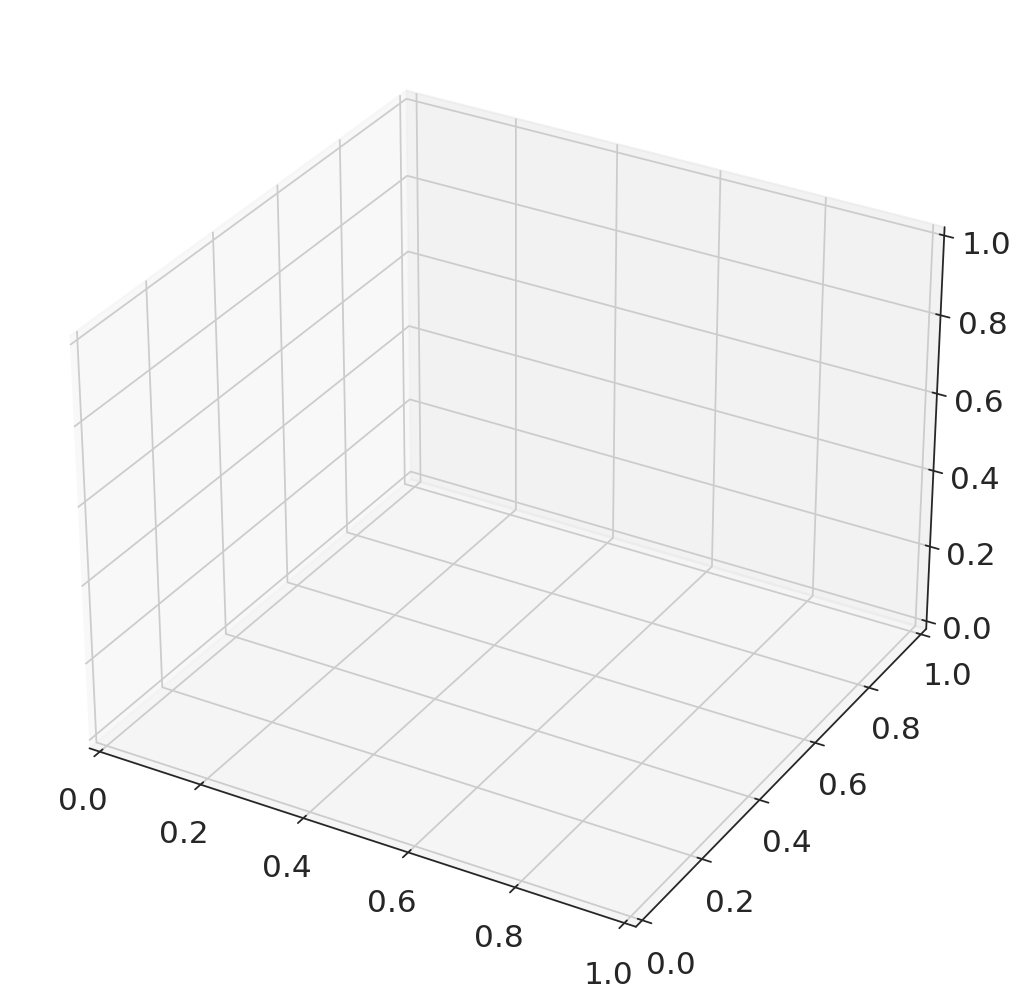

In [19]:
# sc.tl.umap(adata, min_dist= 1, n_components=3)
print_with_elapsed_time(f"umap done")
sc.pl.umap(adata, projection='3d')

In [24]:
adata.obsm['X_umap']

array([[ 4.922956  ,  7.6938934 , 10.037995  ],
       [ 5.0543528 ,  7.884187  , 10.480078  ],
       [-2.1532571 , 14.510011  ,  0.51371634],
       ...,
       [ 5.505021  , 11.680483  ,  5.685668  ],
       [ 3.263786  ,  8.036714  ,  7.430401  ],
       [ 3.7930548 , 12.951005  ,  8.98704   ]], dtype=float32)

Text(0.5, 0, 'Z Label')

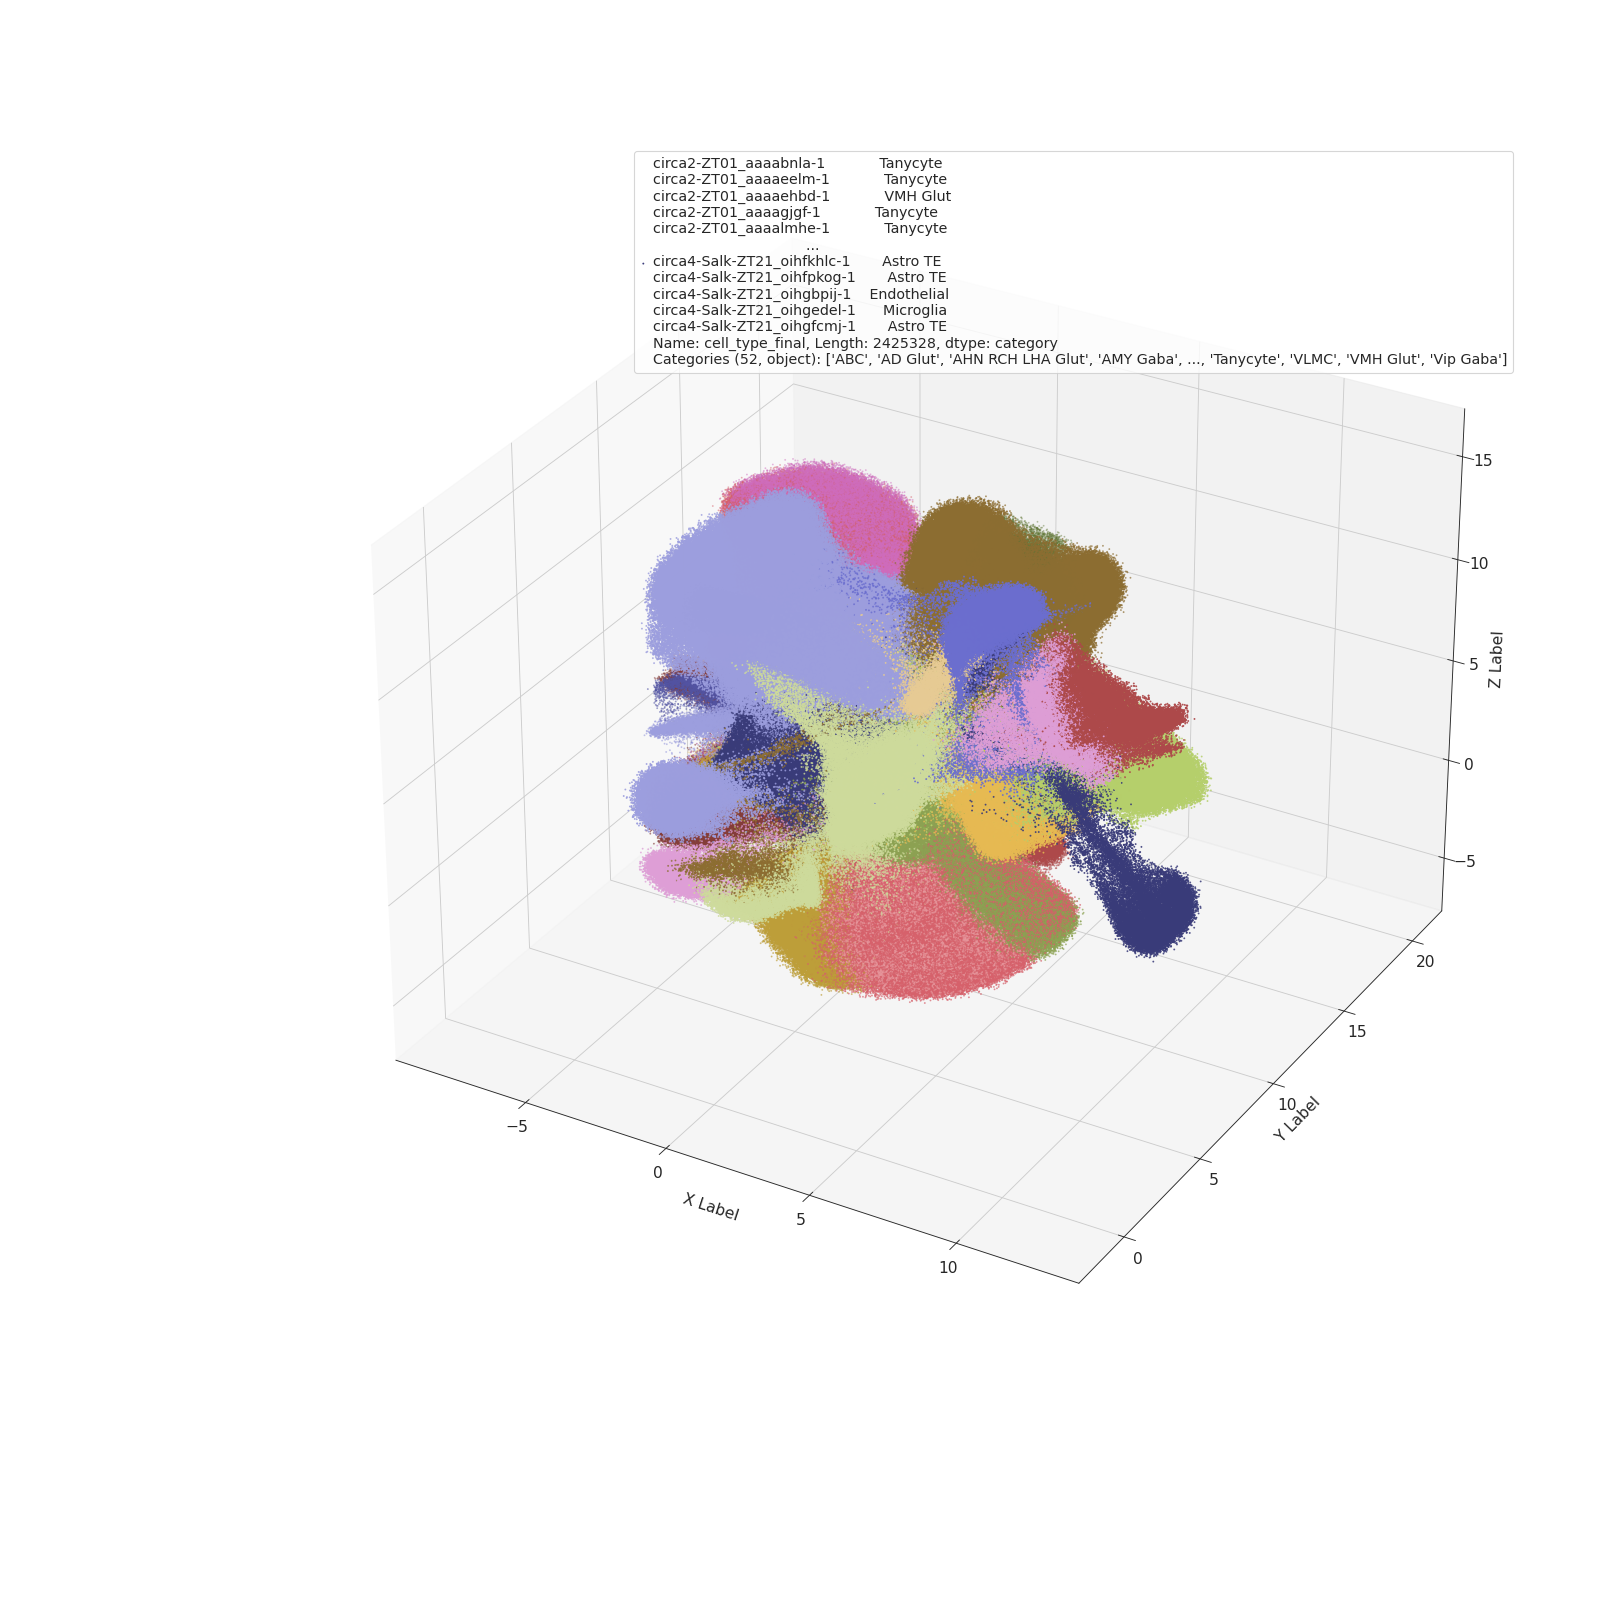

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

adata.obs['umap-1'] = adata.obsm['X_umap'][:, 0]
adata.obs['umap-2'] = adata.obsm['X_umap'][:, 1]
adata.obs['umap-3'] = adata.obsm['X_umap'][:, 2]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')


ax.scatter(adata.obs['umap-1'], adata.obs['umap-2'], adata.obs['umap-3'], c = adata.obs['leiden_colors'], s=0.5, label=adata.obs['cell_type_final'])

ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [ ]:
cluster_centroids = adata.obs.groupby(cluster_to_use)[['umap-1', 'umap-2','umap3']].median()

,umap-1,umap-2,umap-3
cell_type_final,,,
ABC,9.242517,7.831429,10.220751
AD Glut,0.181711,16.710913,5.221860
AHN RCH LHA Glut,-3.494725,12.776171,2.070683
AMY Gaba,-4.998258,12.644977,1.172453
AMY Glut,-2.795995,12.057360,-0.631462
Astro TE,2.707085,12.293712,9.271086
BST po Glut,-3.131528,14.693354,3.160647
CA1 ProS Glut,-2.404155,2.744714,0.842918
CA2 FC IG Glut,-0.585973,3.105809,1.748286


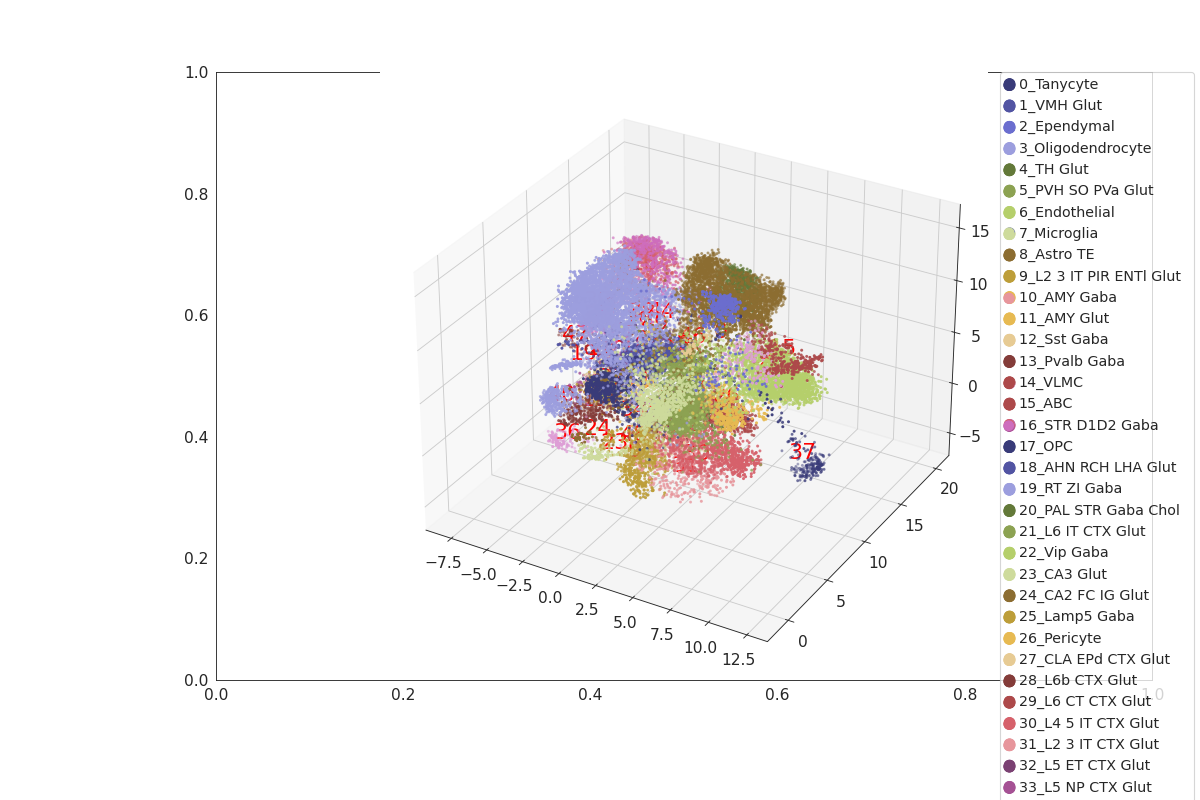

In [88]:
import matplotlib.pyplot as plt
import numpy as np

adata.obs['umap-1'] = adata.obsm['X_umap'][:, 0]
adata.obs['umap-2'] = adata.obsm['X_umap'][:, 1]
adata.obs['umap-3'] = adata.obsm['X_umap'][:, 2]

cluster_centroids = adata.obs.groupby('cell_type_newnum_final')[['umap-1', 'umap-2','umap-3']].median()

cell_type_unique = adata.obs['cell_type_final'].unique()

fig, ax = plt.subplots(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

for idx, celltype in enumerate(cell_type_unique):
    adata_sel = adata[(adata.obs[cluster_to_use] == celltype)]
    ratio_ = int(len(adata_sel.obs['cell_id']) / 100)
    adata_sel = adata_sel[0:ratio_]
    celltype_combine = str(idx) +'_' + str(celltype)
    ax.scatter(adata_sel.obs['umap-1'], adata_sel.obs['umap-2'], adata_sel.obs['umap-3'], s=3, c=adata_sel.obs['leiden_colors'], label = celltype_combine)
for cluster_id, centroid in cluster_centroids.iterrows():
    ax.text(centroid['umap-1'], centroid['umap-2'], centroid['umap-3'], str(cluster_id), color='red', fontsize=20, ha = 'center')

plt.legend(markerscale=5, scatterpoints=10, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# if save_plot == True:
#     plt.savefig(f"plot/{name_dir}/{name_dir}_UMAP_all.png")



# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(adata.obs['umap-1'], adata.obs['umap-2'], adata.obs['umap-3'], c = adata.obs['leiden_colors'], s=0.5, label=adata.obs['cell_type_final'])
# ax.legend()
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

In [84]:
### Let's make UMAP plot. We will also add the cluster centroids to the plot
adata.obs['umap-1'] = adata.obsm['umap'][:, 0]
adata.obs['umap-2'] = adata.obsm['umap'][:, 1]
# cluster_centroids = adata.obs.groupby(cluster_to_use)[['umap-1', 'umap-2']].median()
adata.obs['umap-3'] = adata.obsm['umap'][:, 0]
adata.obs['umap-4'] = adata.obsm['umap'][:, 1]
# cluster_centroids = adata.obs.groupby(cluster_to_use)[['umap-1', 'umap-2']].median()

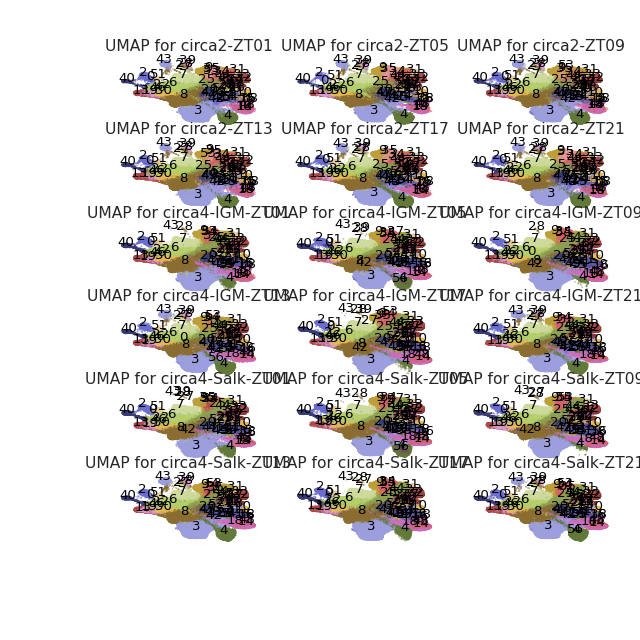

In [45]:
## Draw UMAP
# a = int(len(samples) / 2)
# b = 2

fig, axs = plt.subplots(6,3
                        #, figsize=(20,20)
                        )
axs = axs.flatten()

def plot_umap(adata, color_column, ax, title=None):
    scatter = ax.scatter(adata.obs['umap-3'], adata.obs['umap-4'], c=adata.obs[color_column], s=0.1, alpha=0.8)
    ax.set_title(title)
    ax.axis('off')

for i, sample in enumerate(samples_ids):
    sample_data = adata[adata.obs['sample'] == sample]
    plot_umap(sample_data, 'leiden_colors', axs[i], title=f"UMAP for {sample}")
    cluster_centroids = sample_data.obs.groupby(cluster_to_use)[['umap-3', 'umap-4']].median()
    
    for cluster_id, centroid in cluster_centroids.iterrows():
        axs[i].text(centroid['umap-3'], centroid['umap-4'], str(cluster_id), color='black', fontsize=12, ha = 'center')


# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_UMAP_{cluster_to_use}.png")
del sample_data

In [ ]:
cell_type_unique = adata.obs['cell_type_newnum_auto_sub'].unique()
cluster_centroids = adata.obs.groupby('cell_type_newnum_auto_sub')[['umap-3', 'umap-4']].median()

### Generate a color palette for the clusters - to make color stay consistent across samples
adata.obs[cluster_to_use] = adata.obs[cluster_to_use].astype(str)

# Create a palette with a unique color for each cluster
num_clusters = len(adata.obs[cluster_to_use].astype(int).unique())
palette = sns.color_palette("tab20b", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata.obs['leiden_colors'] = adata.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

fig, ax = plt.subplots(figsize=(15, 10))
for idx, celltype in enumerate(cell_type_unique):
    adata_sel = adata[(adata.obs['cell_type_newnum_auto_sub'] == celltype)]
    celltype_name = adata_sel.obs['cell_type_auto_sub'].unique()[0]
    # celltype = celltype.astype(str)
    celltype_combine = str(celltype) + '_' + celltype_name
    scat = ax.scatter(adata_sel.obs['umap-3'].values, adata_sel.obs['umap-4'].values, c=adata_sel.obs['leiden_colors'], s = 0.01, label = celltype_combine)
for cluster_id, centroid in cluster_centroids.iterrows():
    ax.text(centroid['umap-3'], centroid['umap-4'], str(cluster_id), color='black', fontsize=12, ha = 'center')

plt.legend(markerscale=20, scatterpoints=1000, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_UMAP_all.png")
del adata_sel

In [ ]:
sc.pl.umap(adata, color=["Pvalb"], vmin = 0)

In [ ]:
### Generate a color palette for the clusters - to make color stay consistent across samples
adata.obs['sample'] = adata.obs['sample'].astype(str)
dict_sample = {"3161-1": 0,
              "3159-2":1,
              "2505-1":0,
              "2505-2":1,
              "2670-1":4,
              "3160-1":3,
              "3160-2":2,
              "3159-1":5
              
              
              }
adata.obs['sample_id'] = adata.obs['sample'].map(dict_sample) 

# Create a palette with a unique color for each cluster
num_clusters = len(adata.obs['sample_id'].astype(int).unique())
palette = sns.color_palette("tab20", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata.obs['leiden_colors'] = adata.obs['sample_id'].astype(int).apply(lambda x: palette[x])

cell_type_unique = adata.obs['sample_id'].unique()
cluster_centroids = adata.obs.groupby('sample_id')[['umap-3', 'umap-4']].median()

fig, ax = plt.subplots(figsize=(15, 10))

for idx, celltype in enumerate(cell_type_unique):
    adata_sel = adata[(adata.obs['sample_id'] == celltype)]
    scat = ax.scatter(adata_sel.obs['umap-3'].values, adata_sel.obs['umap-4'].values, c=adata_sel.obs['leiden_colors'], s = 0.05, label = celltype)
for cluster_id, centroid in cluster_centroids.iterrows():
    ax.text(centroid['umap-3'], centroid['umap-4'], str(cluster_id), color='black', fontsize=12, ha = 'center')

plt.legend(markerscale=20, scatterpoints=1000, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_UMAP_all.png")

## Quick look at the data

In [ ]:
### Choose one cluster to work with
cluster_to_use = 'cell_type_newnum_final'
cluster_to_use = 'cell_type_newnum_auto_sub'
# cluster_to_use = 'cell_type_newnum_auto'
# cluster_to_use = 'cell_class_newnum_auto'
# cluster_to_use = 'L04_newnum'
cluster_to_use = 'region_automap_num'
# cluster_to_use = 'leiden'

In [ ]:
adata.obs['x_centroid'].astype('float')
adata.obs['y_centroid'].astype('float')

if cluster_to_use == 'cell_type_newnum_auto_sub':
    label_to_use = 'cell_type_auto_sub'
elif cluster_to_use == 'cell_type_newnum_auto':
    label_to_use = 'cell_type_auto'
elif cluster_to_use == 'cell_type_newnum_final':
    label_to_use = 'cell_type_final'
elif cluster_to_use == 'region_automap_num':
    label_to_use = 'region_automap_name'
else:
    label_to_use = 'leiden'

### Generate a color palette for the clusters - to make color stay consistent across samples
adata.obs[cluster_to_use] = adata.obs[cluster_to_use].astype(str)

# Create a palette with a unique color for each cluster
num_clusters = len(adata.obs[cluster_to_use].astype(int).unique())
palette = sns.color_palette("tab20b", n_colors=num_clusters +1)

# Map each 'leiden' value to a color
adata.obs['leiden_colors'] = adata.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

# Map all cells
fig, axs = plt.subplots(6,3, figsize=(40,40))
axs = axs.flatten()# Mapping of clusters
# colors = adata.uns['leiden_colors']
# needed_list = [str(i) for i in range(0, len(adata.obs['leiden0.4'].unique()))]

clusters_plot = {"2":"black",
                 "47": 'magenta',"6": 'blue', "44": 'green', "61":'red', "":'pink',"":'black', "":"darkgreen"
                }

samples_ids = adata.obs['sample'].unique()
for idx, sample in enumerate(samples_ids):
    adata_sel = adata[(adata.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[cluster_to_use].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[cluster_to_use] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none" ### for selected clusters in cluster_plot
        colors= cluster_data['leiden_colors'].unique()[0] ### for all clusters
        axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=1, label=cluster_data[label_to_use].unique()[0])
        axs[idx].set_title(f"Sample {sample}")
        

plt.legend(markerscale=5, scatterpoints=100, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.savefig(f"plot/{name_dir}/{name_dir}_map_{cluster_to_use}_2.png")

In [ ]:
### Plot gene expression

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

gene_ = 'CD68'
adata_temp = adata
df_dict = dict(zip(df.index, df[gene_]))
adata_temp.obs[gene_] = adata_temp.obs['cell_id'].map(df_dict)

### to crop
adata_temp = adata_temp[(adata_temp.obs['x_centroid'] > 4000) & (adata_temp.obs['x_centroid'] < 6000)
                            & (adata_temp.obs['y_centroid'] > 4000) & (adata_temp.obs['y_centroid'] < 5000)]

# f, ax = plt.subplots(figsize=(15, 10))

fig, axs = plt.subplots(3,2#,figsize=(15, 15)
                        )
axs = axs.flatten()# Mapping of clusters

for idx, sample in enumerate(samples_ids):
    adata_graph = adata_temp[adata_temp.obs['sample'] == sample]
    
    sns.scatterplot(x='x_centroid', y='y_centroid',
                s=2, legend= False,
                palette='viridis',
                hue=gene_,
                data=adata_graph.obs, ax=axs[idx]).set(title=f"{sample} - {gene_}", xlabel = None, ylabel = None, xticklabels = [],yticklabels = [])

# Create the colorbar
norm = mpl.colors.Normalize(vmin=adata_temp.obs[gene_].min(),vmax=adata_temp.obs[gene_].max())
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs[-1], aspect=40, shrink=0.8)  # Adjust aspect/shrink

del adata_temp, adata_graph


In [ ]:
import math
# to_use = 'total_transcript' ### Run1
to_use = 'transcript_counts' ### Run3
samples = adata.obs['sample'].unique()

### Map log transcript counts 
adata_sel = adata[(adata.obs['sample'] == samples[0])]
adata_sel.obs[to_use] = adata_sel.obs[to_use].astype(float)
adata_sel.obs['log_transcript_counts'] = adata_sel.obs[to_use].apply(lambda x: math.log10(x))

fig, ax = plt.subplots(figsize=(15,15))
transcript_counts_unique = adata_sel.obs['log_transcript_counts'].unique()
cmap = plt.cm.jet
for cluster_id in transcript_counts_unique:
    cluster_data = adata_sel.obs[adata_sel.obs['log_transcript_counts'] == cluster_id]
    colors = cmap((cluster_id - transcript_counts_unique.min()) / (transcript_counts_unique.max() - transcript_counts_unique.min()))
    plt.scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=1, label=cluster_id)
plt.xlabel('x_centroid')
plt.ylabel('y_centroid')
plt.title('Map of transcript counts (log)')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(transcript_counts_unique)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='1.5%', pad=0.05)
plt.colorbar(sm, cax=cbar_ax, label='Transcript Counts')
plt.ylabel('Transcript counts (log)')

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_logtranscounts.png")

In [ ]:
# to_use = 'n_genes' ### Run1
to_use = 'n_genes_by_counts' ### Run3
samples = adata.obs['sample'].unique()

### Map log n_genes_by_counts 
adata_sel = adata[(adata.obs['sample'] == samples[0])]
adata_sel.obs[to_use] = adata_sel.obs[to_use].astype(float)
adata_sel.obs['log_n_genes_by_counts'] = adata_sel.obs[to_use].apply(lambda x: math.log10(x))

fig, ax = plt.subplots(figsize=(15,15))
transcript_counts_unique = adata_sel.obs['n_genes_by_counts'].unique()
cmap = plt.cm.jet
for cluster_id in transcript_counts_unique:
    cluster_data = adata_sel.obs[adata_sel.obs['n_genes_by_counts'] == cluster_id]
    colors = cmap((cluster_id - transcript_counts_unique.min()) / (transcript_counts_unique.max() - transcript_counts_unique.min()))
    plt.scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=1, label=cluster_id)
plt.xlabel('x_centroid')
plt.ylabel('y_centroid')
plt.title('Map of Nb of gene per cell')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(transcript_counts_unique)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='1.5%', pad=0.05)
plt.colorbar(sm, cax=cbar_ax)
plt.ylabel('Nb of gene per cell')

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_nbgenes.png")

In [ ]:
### Map mmc:cluster_correlation_coefficient
adata_sel = adata[(adata.obs['sample'] == samples[0])]

fig, ax = plt.subplots()
transcript_counts_unique = adata_sel.obs['mmc:class_correlation_coefficient'].unique()
cmap = plt.cm.jet
for cluster_id in transcript_counts_unique:
    cluster_data = adata_sel.obs[adata_sel.obs['mmc:class_correlation_coefficient'] == cluster_id]
    colors = cmap((cluster_id - transcript_counts_unique.min()) / (transcript_counts_unique.max() - transcript_counts_unique.min()))
    plt.scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=0.5, label=cluster_id)
plt.xlabel('x_centroid')
plt.ylabel('y_centroid')
plt.title('Map of mmc:class_correlation_coefficient')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(transcript_counts_unique)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(sm, cax=cbar_ax, label='correlation_coefficient')

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_mmccoef.png")

# Analysis

## Data Import (always run)

In [ ]:
adata = sc.read_h5ad(f"h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

In [ ]:
adata2 = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz")

In [ ]:
type(adata.X),type(adata2.X),type(adata_subcluster.X)

In [ ]:
# adata2.obs['cell_type_newnum'] = adata.obs['cell_type_newnum']
# adata2.obs['cell type'] = adata.obs['cell type']
adata2.obs['cell_type_newnum_auto'] = adata.obs['cell_type_newnum_auto']
adata2.obs['cell_type_auto'] = adata.obs['cell_type_auto']
adata2.obs['cell_type_newnum_auto_sub'] = adata.obs['cell_type_newnum_auto_sub']
adata2.obs['cell_type_auto_sub'] = adata.obs['cell_type_auto_sub']
# adata2.obs['cell_type_newnum_final'] = adata.obs['cell_type_newnum_final']
# adata2.obs['cell_type_final'] = adata.obs['cell_type_final']
# adata2.obs['region_automap'] = adata.obs['region_automap_name']
# adata2.obs['region_manual'] = adata.obs['region_manual_name']

In [ ]:
# HC only
adata2.obs['Genotype'] = 0
adata2.obs['ZT'] = 0

geno_dict = {'3159-1':'WT','2670-1':'WT','3159-2':'WT','3159-3':'WT','3159-4':'WT','2505-1':'APP','2505-2':'APP','3160-1':'APP',
             '3160-2':'APP','3161-1':'APP','3161-2':'APP','3161-3':'APP',
}
ZT_dict = {
    '3159-1':'ZT17','2670-1':'ZT5','3159-2':'ZT17','3159-3':'ZT17','3159-4':'ZT17','2505-1':'ZT5','2505-2':'ZT5',
'3160-1':'ZT17','3160-2':'ZT17','3161-1':'ZT17','3161-2':'ZT17','3161-3':'ZT17',
}

adata2.obs['Genotype'] = adata2.obs['sample'].map(geno_dict)
adata2.obs['ZT'] = adata2.obs['sample'].map(ZT_dict)

In [ ]:
sc.pl.highest_expr_genes(adata2, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

In [ ]:
adata2_WT=adata2[adata2.obs['Genotype']== 'WT']
adata2_APP=adata2[adata2.obs['Genotype']== 'APP']

sc.pl.highest_expr_genes(adata2_WT, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)
sc.pl.highest_expr_genes(adata2_APP, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

## Find marker genes for each cluster

In [ ]:
# Obtain cluster-specific differentially expressed genes
# cluster_to_use = 'cell_type_newnum'
# cluster_to_use = 'cell type'
# cluster_to_use = 'cell_type_auto'
# cluster_to_use = 'cell_type_auto_sub'
# cluster_to_use = 'sample'
cluster_to_use = 'cell_type_final'
# sc.pp.normalize_total(adata, inplace=True)
# sc.pp.log1p(adata)
adata.obs[cluster_to_use] = adata.obs[cluster_to_use].astype(str)
sc.tl.rank_genes_groups(adata, groupby=cluster_to_use, method="wilcoxon", tie_correct = True)


In [ ]:
sc.pl.rank_genes_groups_dotplot(adata, groupby=cluster_to_use, standard_scale="var", n_genes=1, dendrogram = True)

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    n_genes=1,
    values_to_plot="logfoldchanges", cmap='bwr',
    vmin=-4,
    vmax=4,
)

In [ ]:
dat = pd.DataFrame()
for i in range(0, len(adata.obs[cluster_to_use].unique())):
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata, group=str(i))
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

dat.to_csv("marker_genes_0-4_run1.csv")

In [ ]:
marker_genes = [
# 10X annotations
# "Acsbg1","Aqp4","Cdh20","Clmn","Gfap","Gli3","Id2","Mapk4","Ntsr2","Pde7b","Rfx4","Rorb","Slc39a12", #Astrocytes
# "Arhgap12","Fibcd1","Sipa1l3","Wfs1", #CA1-ProS
# "2010300C02Rik","Arhgef28","Bcl11b","Bhlhe22","Cabp7","Cpne4","Igfbp4","Necab2","Prdm8","Strip2","Syndig1", #CA2
# "Cpne6","Epha4","Hat1","Neurod6","Npy2r","Nrp2","Shisa6", #CA3
# "Cdh9","Orai2","Prox1","Rasl10a","Tanc1", #DG
# "Acvrl1","Adgrl4","Car4","Cd93","Cldn5","Cobll1","Emcn","Fgd5","Fn1","Kdr","Ly6a","Mecom","Nostrin","Paqr5","Pecam1","Pglyrp1","Slfn5","Sox17","Zfp366", #Endothelial
#"Arhgap25","Cd300c2","Cd53","Cd68","Ikzf1","Laptm5","Siglech","Sla","Spi1","Trem2",#Microglia
# 'Gjc3','Gpr17','Opalin','Sema3d','Sema6a','Sox10','Zfp536', #Oligodendrocytes
# 'Acta2','Ano1','Arhgap6','Carmn','Cspg4','Fos','Gucy1a1','Inpp4b','Nr2f2','Pip5k1b','Plekha2','Pln','Sncg','Sntb1', # Pericytes
# 'Aldh1a2','Col1a1','Col6a1','Cyp1b1','Dcn','Fmod','Gjb2','Igf2','Pdgfra','Ror1',"Slc13a4","Spp1", #VLMC
# "Chat","Crh","Igf1",'Penk','Pthlh','Sorcs3','Thsd7a','Vip', #Vip interneurons

'Arntl','Clock','Cry1','Cry2','Nr1d1',"Per1",'Per2','Per3','Rora','Rorb', ## Clock genes
# 'Gfap','Trem2','Cd44','Spp1','Cd68','Igf1','Spi1','Cd300c2','Cd53','Laptm5','Ikzf1','Arhgap25','Opalin','Prox1','Cbln1','Sema3a','Paqr5','Spag16',
# "Vip", "Pkib", "Tmem255a", "Arhgap6", "Chodl", #SCN rank genes analysis
# 'Strip2',"Shisa6","Chodl", 'Fos','Sdk2', 'Cdh6','Cobll1','Tanc1'
# 'Dner','Gad1','Rasgrf2','Vat1l','Pde7b','Igfbp5','Rorb','Rims3','Tmem255a','Cdh13','Gad2','Rab3b','Parm1','Tle4','Fhod3','Rmst','Vip','Nr2f2','Arhgap6',
# 'Laptm5','Kctd12','Siglech','Trem2','Cd53','Cd68','Cd300c2','Ikzf1','Spi1','Acsbg1','Gfap','Dpy19l1','Unc13c','Arhgap25','Meis2','Dner','Arhgap12','Igfbp5','Ntsr2',
# "Gfap","Rbp4","Trem2","Th","Laptm5","Syt17","Opn3","Spp1","Cd44","Cd53","Igf1","Gjb2",
# "Vip","Prss35","Cd68","Cplx3","Siglech","Ikzf1","Cd300c2","Dcn","Spi1","Pkib","Fos","Angpt1",
# "Igfbp5","Chrm2","Rspo2","Arhgap25","Sst",
# 'Ntsr2'    
]


In [ ]:
ax = sc.pl.stacked_violin(adata2,
                         marker_genes,
                         groupby='cell_type_final',
                         dendrogram=False,
                         log=False,
                         )

In [ ]:
sc.pl.violin(adata2, marker_genes, groupby='Genotype', order = ['WT','APP'],
             jitter = 0.45,
             # log = True,
             # stripplot = False,
            )

## Subset (a)dataset for one cell type

In [ ]:
adata.obs.groupby('cell_type_final')['cell_id'].count()

In [ ]:
celltype_to_subset = "SCH Gaba"
adata_microglia = adata[adata.obs['cell_type_final'] == celltype_to_subset]

In [ ]:
adata_microglia.obs['sample']#,adata_microglia.obs['Genotype']

In [ ]:
marker_genes = [
# 10X annotations
# "Acsbg1","Aqp4","Cdh20","Clmn","Gfap","Gli3","Id2","Mapk4","Ntsr2","Pde7b","Rfx4","Rorb","Slc39a12", #Astrocytes
# "Arhgap12","Fibcd1","Sipa1l3","Wfs1", #CA1-ProS
# "2010300C02Rik","Arhgef28","Bcl11b","Bhlhe22","Cabp7","Cpne4","Igfbp4","Necab2","Prdm8","Strip2","Syndig1", #CA2
# "Cpne6","Epha4","Hat1","Neurod6","Npy2r","Nrp2","Shisa6", #CA3
# "Cdh9","Orai2","Prox1","Rasl10a","Tanc1", #DG
# "Acvrl1","Adgrl4","Car4","Cd93","Cldn5","Cobll1","Emcn","Fgd5","Fn1","Kdr","Ly6a","Mecom","Nostrin","Paqr5","Pecam1","Pglyrp1","Slfn5","Sox17","Zfp366", #Endothelial
# "Arhgap25","Cd300c2","Cd53","Cd68","Ikzf1","Laptm5","Siglech","Sla","Spi1","Trem2",#Microglia
# 'Gjc3','Gpr17','Opalin','Sema3d','Sema6a','Sox10','Zfp536', #Oligodendrocytes
# 'Acta2','Ano1','Arhgap6','Carmn','Cspg4','Fos','Gucy1a1','Inpp4b','Nr2f2','Pip5k1b','Plekha2','Pln','Sncg','Sntb1', # Pericytes
# 'Aldh1a2','Col1a1','Col6a1','Cyp1b1','Dcn','Fmod','Gjb2','Igf2','Pdgfra','Ror1',"Slc13a4","Spp1", #VLMC
# "Chat","Crh","Igf1",'Penk','Pthlh','Sorcs3','Thsd7a','Vip', #Vip interneurons

'Arntl','Clock','Cry1','Cry2','Nr1d1',"Per1",'Per2','Per3','Rora','Rorb', ## Clock genes

# "Vip", "Pkib", "Tmem255a", "Arhgap6", "Chodl", #SCN rank genes analysis
# 'Strip2',"Shisa6","Chodl", 'Fos','Sdk2', 'Cdh6','Cobll1','Tanc1'
# 'Dner','Gad1','Rasgrf2','Vat1l','Pde7b','Igfbp5','Rorb','Rims3','Tmem255a','Cdh13','Gad2','Rab3b','Parm1','Tle4','Fhod3','Rmst','Vip','Nr2f2','Arhgap6',
# 'Laptm5','Kctd12','Siglech','Trem2','Cd53','Cd68','Cd300c2','Ikzf1','Spi1','Acsbg1','Gfap','Dpy19l1','Unc13c','Arhgap25','Meis2','Dner','Arhgap12','Igfbp5','Ntsr2',
# "Gfap","Rbp4","Trem2","Th","Laptm5","Syt17","Opn3","Spp1","Cd44","Cd53","Igf1","Gjb2",
# "Vip","Prss35","Cd68","Cplx3","Siglech","Ikzf1","Cd300c2","Dcn","Spi1","Pkib","Fos","Angpt1",
# "Igfbp5","Chrm2","Rspo2","Arhgap25","Sst",
# 'Ntsr2'    
]

In [ ]:
sc.pl.stacked_violin(adata_microglia, marker_genes, groupby='sample', dendrogram=False,)

In [ ]:
sc.pl.violin(adata_microglia, marker_genes, groupby='ZT',
             #order = ['WT','APP'],
             #log = True,
             # stripplot = False,
            )

In [ ]:
    sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
    
    # sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)
    
    for i in adata2.obs[cluster_to_use].unique():
        # print(f"Cluster {cell_type_to_extract}_{i}")
        dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
        dat1['group'] = i
        dat = pd.concat([dat, dat1])

    dat = dat[ ### Choose filters here
    (dat['pct_nz_group'] > 0.15) & #Percentage of cell expressing the gene
    (dat['pvals_adj']<= 0.05) & # adjusted p-value
    (abs(dat['logfoldchanges']) > 0.26) # logfoldchange
    ]

In [ ]:
cluster_to_use = "ZT"

sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)


dat = pd.DataFrame()
for i in adata_microglia.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=str(i))
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

dat = dat[ ### Choose filters here
    (dat['pct_nz_group'] > 0.15)  #Percentage of cell expressing the gene
    & (dat['pvals_adj']<= 0.05) # # adjusted p-value
    # & (abs(dat['logfoldchanges']) > 0.26) # logfoldchange
    ]

dat.to_csv("data/SCH.csv")

In [ ]:
sc.pl.highest_expr_genes(adata_microglia, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

In [ ]:
adata_microglia_WT=adata_microglia[adata_microglia.obs['Genotype']== 'WT']
adata_microglia_APP=adata_microglia[adata_microglia.obs['Genotype']== 'APP']

sc.pl.highest_expr_genes(adata_microglia_WT, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)
sc.pl.highest_expr_genes(adata_microglia_APP, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

### Subcluster the subset

In [ ]:
# extract pca coordinates
# X_pca = adata_microglia.obsm['X_pca'] 

sc.pp.pca(adata_microglia)
sc.pp.neighbors(adata_microglia)
sc.tl.umap(adata_microglia)

### Kmeans clustering
# ### You can choose the number of clusters by uncommenting n_clusters option
# kmeans = KMeans(#n_clusters=2,
#                 random_state=0).fit(X_pca) 
# adata_microglia.obs['kmeans'] = kmeans.labels_.astype(str)

sc.tl.leiden(adata_microglia, resolution = 0.2)

In [ ]:
# adata.obs.groupby('cell type')[['nucleus_area','cell_area','total_counts','n_genes_by_counts']].max().sort_values(by = 'cell_area')

In [ ]:
### Choose one cluster to work with
#cluster_to_use = 'leiden0.4_classname'
# cluster_to_use = 'kmeans'
cluster_to_use = 'leiden'
# cluster_to_use = 'L04_newnum'

In [ ]:
### Number of cells per clusters
max_clust = len(adata_microglia.obs[cluster_to_use].unique())
for i in range(0, max_clust):
    count = adata_microglia.obs[cluster_to_use].value_counts().iloc[i]
    print(f"Cluster {i} : {count} cells")

In [ ]:
### Generate a color palette for the clusters - to make color stay consistent across samples
adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)

# Create a palette with a unique color for each cluster
num_clusters = len(adata_microglia.obs[cluster_to_use].astype(int).unique())
palette = sns.color_palette("tab20", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata_microglia.obs['leiden_colors'] = adata_microglia.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

In [ ]:
### Let's make UMAP plot. We will also add the cluster centroids to the plot
adata_microglia.obs['umap-1'] = adata_microglia.obsm['X_umap'][:, 0]
adata_microglia.obs['umap-2'] = adata_microglia.obsm['X_umap'][:, 1]
cluster_centroids = adata_microglia.obs.groupby(cluster_to_use)[['umap-1', 'umap-2']].median()

In [ ]:
## Draw UMAP
fig, axs = plt.subplots(2,4,figsize=(30, 15))
axs = axs.flatten()

def plot_umap(adata_microglia, color_column, ax, title=None):
    scatter = ax.scatter(adata_microglia.obsm['X_umap'][:, 0], adata_microglia.obsm['X_umap'][:, 1], c=adata_microglia.obs[color_column], s=2, alpha=0.8)
    ax.set_title(title)
    ax.axis('off')

for i, sample in enumerate(samples_ids):
    sample_data = adata_microglia[adata_microglia.obs['sample'] == sample]
    plot_umap(sample_data, 'leiden_colors', axs[i], title=f"UMAP for {sample}")
    
    for cluster_id, centroid in cluster_centroids.iterrows():
        axs[i].text(centroid['umap-1'], centroid['umap-2'], str(cluster_id), color='black', fontsize=9)

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_UMAP_{cluster_to_use}.svg")

In [ ]:
samples_ids = adata_microglia.obs['sample'].unique()

In [ ]:
# Map all cells
fig, axs = plt.subplots(2,4,figsize=(30, 15))
axs = axs.flatten()
clusters_plot = {"1": 'magenta',"0": 'cyan', "2": 'green', "":'red', "":'orange',"7":'black',"":"purple"
                }

for idx, sample in enumerate(samples_ids):
    adata_sel = adata_microglia[(adata_microglia.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[cluster_to_use].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[cluster_to_use] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none" ### for selected clusters in cluster_plot
        # colors= cluster_data['leiden_colors'].unique()[0] ### for all clusters
        axs[idx].scatter(cluster_data['x_centroid'].astype('float'), cluster_data['y_centroid'].astype('float'), color=colors, s=10, label=cluster_id)
        axs[idx].set_title(f"Sample {sample}")
        # axs[idx].set_ylim(400,1300)
        # axs[idx].set_xlim(4100,5600)



In [ ]:
### Correlation map of subclusters
cont_tab = pd.crosstab(adata_microglia.obs[cluster_to_use], adata_microglia.obs['mmc:supertype_name'], normalize="index")
plt.figure(figsize=(20, 10))
sns.heatmap(cont_tab, annot=True, cmap="YlGnBu", fmt=".1f")

In [ ]:
# Obtain cluster-specific differentially expressed genes
# cluster_to_use = 'leid'
# cluster_to_use = 'Genotype'
adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
# sc.tl.dendrogram(adata_microglia, groupby = cluster_to_use, n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)

sc.pl.rank_genes_groups_dotplot(
    adata_microglia,
    n_genes=5,
    values_to_plot="logfoldchanges", cmap='bwr',
    vmin=-4,
    vmax=4,
)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_microglia, groups=adata_microglia.obs[cluster_to_use], n_genes=1)

In [ ]:
marker_genes = ['Gfap', "Igf1", "Gng12", "Cd68", "Igfbp5", "Siglech", "Ikzf1", "Kctd12", "Cd300c2", "Spi1"]

In [ ]:
ax = sc.pl.stacked_violin(adata_microglia, var_names = marker_genes , groupby='kmeans', dendrogram=True)

In [ ]:
# Obtain cluster-specific differentially expressed genes
# cluster_to_use = 'kmeans'
cluster_to_use = 'ZT'
adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
# sc.tl.dendrogram(adata_microglia, groupby = cluster_to_use, n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True)
sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5, dendrogram = False)

sc.pl.rank_genes_groups_dotplot(
    adata_microglia,
    n_genes=5,
    values_to_plot="logfoldchanges", cmap='bwr',
    dendrogram = False
    # vmin=-4,
    # vmax=4,
)

In [ ]:
### Extract gene expression per cluster + log fold change + p-value
cluster_to_use = 'Genotype'

adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)

sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)

dat = pd.DataFrame()
for i in adata2.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_{celltype_to_subset}.csv")

In [ ]:
dat

In [ ]:
celltype_to_subset = "SCH"
adata_region_cell = adata2[adata2.obs['cell type'] == celltype_to_subset]

## Subset one region

In [ ]:
adata2.obs['region_automap'].unique()

In [ ]:
region_to_subset = "SCH"
adata_region = adata2[adata2.obs['region_automap'] == region_to_subset]

In [ ]:
adata_region.obs[adata_region.obs['cell_type_final']== 'SCH Gaba'].groupby('mmc:subclass_name')['cell_id'].nunique()

In [ ]:
adata_region.obs[adata_region.obs['cell_type_final']=='SCH']['cell_type_newnum_final'].head()

In [ ]:
# Generate new numbering base on unique 'cell type'
all_cell_type = adata_region.obs['cell type'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata_region.obs['cell_type_newnum'] = adata_region.obs['cell type'].map(mapping_dict)
# mapping_dict

### Generate a color palette for the clusters - to make color stay consistent across samples
adata_region.obs['cell_type_newnum'] = adata_region.obs['cell_type_newnum'].astype(int)

# Create a palette with a unique color for each cluster
num_clusters = len(adata_region.obs['cell_type_newnum'].unique())
palette = sns.color_palette("bright", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata_region.obs['kmeans_colors'] = adata_region.obs['cell_type_newnum'].apply(lambda x: palette[x])

# Mapping of clusters
fig, axs = plt.subplots(3,2,figsize=(15, 18))
axs = axs.flatten()
clusters_plot = { 1: 'lightcoral', 11:'black',4:'red',
    # 0: 'orchid', 1: 'forestgreen',2: 'coral', 4:'orange',
    # 3:'red', 5:'blue',6:'cyan',7:'black'
    # 4:'red',0:'black'
}

for idx, sample in enumerate(samples_ids):
    adata_sel = adata_region[(adata_region.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs['cell_type_newnum'].unique():
        cluster_data = adata_sel.obs[adata_sel.obs['cell_type_newnum'] == cluster_id]
        if len(cluster_data) >= 0:
            colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none"
            colors= cluster_data['kmeans_colors'].unique()[0]
            axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=15, label=cluster_data['cell type'].unique()[0])
            axs[idx].set_title(f"Sample {sample}")

plt.legend(markerscale=1, scatterpoints=1000, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [ ]:
# len(adata_region)/1000
# adata_region_notunique.obs.groupby('cell type')['cell_id'].nunique()
# list_to_exclude

In [ ]:
list_to_exclude  = adata_region.obs.groupby('cell type')['cell_id'].nunique() >= 10
list_to_exclude.values
dict_exclude = dict(zip(list_to_exclude.index, list_to_exclude.values))
dict_exclude

adata_region.obs['exclude'] = adata_region.obs['cell type'].map(dict_exclude)

adata_region_notunique = adata_region[adata_region.obs['exclude'] != False]

adata_region_notunique.obs.groupby('cell type')['cell_id'].nunique()

sc.tl.dendrogram(adata_region_notunique, groupby = 'cell type', n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
sc.tl.rank_genes_groups(adata_region_notunique, groupby='cell type', method="wilcoxon", tie_correct = True)
sc.pl.rank_genes_groups_dotplot(adata_region_notunique, groupby='cell type', standard_scale="var", n_genes=5)

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata_region_notunique,
    n_genes=5,
    values_to_plot="logfoldchanges", cmap='bwr',
    # vmin=-4,
    # vmax=4,
)

In [ ]:
### Extract gene expression per cluster + log fold change + p-value
cluster_to_use = 'Genotype'

adata_region.obs[cluster_to_use] = adata_region.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata_region, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)

sc.pl.rank_genes_groups_dotplot(adata_region, groupby=cluster_to_use, standard_scale="var", n_genes=5)

dat = pd.DataFrame()
for i in adata_region.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata_region, group=i)
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_{region_to_subset}-region.csv")

In [ ]:
celltype_to_subset = "Astro"
adata_region_cell = adata_region[adata_region.obs['cell type'] == celltype_to_subset]

In [ ]:
### Extract gene expression per cluster + log fold change + p-value
cluster_to_use = 'Genotype'

adata_region_cell.obs[cluster_to_use] = adata_region_cell.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata_region_cell, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)

sc.pl.rank_genes_groups_dotplot(adata_region_cell, groupby=cluster_to_use, standard_scale="var", n_genes=5)

dat = pd.DataFrame()
for i in adata_region_cell.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata_region_cell, group=i)
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_{region_to_subset}-region-{celltype_to_subset}-cell.csv")

# Output files

## Extract foldchange, pvalue for celltypes

In [ ]:
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

In [ ]:
adata2 = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz")

In [ ]:
mapping_dict_region = dict(zip(adata.obs['cell_id'], adata.obs['region_automap_name']))
mapping_dict_celltype = dict(zip(adata.obs['cell_id'], adata.obs['cell_type_final']))
mapping_dict_celltype_num = dict(zip(adata.obs['cell_id'], adata.obs['cell_type_newnum_final']))
# mapping_dict_manos = dict(zip(adata.obs['cell_id'], adata.obs['sample']))

adata2.obs['cell_type_newnum_final'] = adata2.obs['cell_id'].map(mapping_dict_celltype_num)
adata2.obs['cell_type_final'] = adata2.obs['cell_id'].map(mapping_dict_celltype)
adata2.obs['region_automap'] = adata2.obs['cell_id'].map(mapping_dict_region)
# adata2.obs['region_manual'] = adata.obs['region_manual_name']

all_celltype = np.array(adata2.obs['cell_type_final'].unique())

In [ ]:
# HC only
adata2.obs['Genotype'] = 0
adata2.obs['ZT'] = 0

geno_dict = {'3159-1':'WT','2670-1':'WT','3159-2':'WT','3159-3':'WT','3159-4':'WT','2505-1':'APP','2505-2':'APP','3160-1':'APP',
             '3160-2':'APP','3161-1':'APP','3161-2':'APP','3161-3':'APP',
}
ZT_dict = {
    '3159-1':'ZT17','2670-1':'ZT5','3159-2':'ZT17','3159-3':'ZT17','3159-4':'ZT17','2505-1':'ZT5','2505-2':'ZT5',
'3160-1':'ZT17','3160-2':'ZT17','3161-1':'ZT17','3161-2':'ZT17','3161-3':'ZT17',
}

adata2.obs['Genotype'] = adata2.obs['sample'].map(geno_dict)
adata2.obs['ZT'] = adata2.obs['sample'].map(ZT_dict)

In [ ]:
all_celltype = np.array(adata2.obs['cell_type_final'].unique())

In [ ]:
all_samples = adata2.obs['sample'].unique()

In [ ]:
all_copy = all_celltype
for item_ in all_celltype[:]:
    adata_microglia = adata2[adata2.obs['cell_type_final'] == item_]
    
    a = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[0]]) > 2
    b = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[1]]) > 2
    c = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[2]]) > 2
    d = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[3]]) > 2
    e = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[4]]) > 2
    f = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[5]]) > 2
    g = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[6]]) > 2
    h = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[7]]) > 2
    i = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[8]]) > 2
    j = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[9]]) > 2
    k = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[10]]) > 2
    l = len(adata_microglia.obs[adata_microglia.obs['sample'] == all_samples[11]]) > 2

    if not(a & b & c & d & e & f & g & h & i & j & k ):
        all_copy = np.delete(all_copy, np.where(all_copy == item_))        

all_celltype = all_copy

In [ ]:
sc.pp.normalize_total(adata2, inplace=True)
sc.pp.log1p(adata2)

In [ ]:
region_to_ext = 'MH Glut'

adata_subset_region = adata_subset[adata_subset.obs['region']==region_to_ext]

all_celltype = np.array(adata_subset_region.obs['cell_type_final'].unique())

### Remove celltype not present in all group ---- to run until stops returning error
for i in range(0, len(all_celltype)):
    adata_microglia = adata2[adata2.obs['cell_type_final'] == all_celltype[i]]
    if ((len(adata_microglia.obs[adata_microglia.obs['Genotype'] == 'WT']) > 1) & (len(adata_microglia.obs[adata_microglia.obs['Genotype'] == 'APP']) > 1)):
        print('a')
    else:
        all_celltype = np.delete(all_celltype, [i])

In [ ]:
all_celltype = np.delete(all_celltype, np.where(all_celltype == 'AD Glut'))
all_celltype

In [ ]:
adata2.obs[adata2.obs['cell_type_final'] == "AD Glut"]['sample'].unique()


In [ ]:
dfs = []

a_ = 0
strerhyt = '-'
strenbis = ' '

for cell_type_to_extract in all_celltype:
    adata_microglia = adata2[adata2.obs['cell_type_final'] == cell_type_to_extract]
    
    ### Extract gene expression per cluster + log fold change + p-value
    cluster_to_use = 'Genotype'
    clust_uniq = adata2.obs[cluster_to_use].unique()
    dat = pd.DataFrame()

    if (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[1]]) < 2):
        dat['nothing'] = ['to see here']
        dfs.append(dat)
        a_ +=1
        print(f'[{a_ * strerhyt}{(len(all_celltype) - a_)*strenbis}] Cluster {a_} / {len(all_celltype)}')
        continue

    adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
    #sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
    sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
    
    # sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)
    
    for i in adata2.obs[cluster_to_use].unique():
        # print(f"Cluster {cell_type_to_extract}_{i}")
        dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
        dat1['group'] = i
        dat = pd.concat([dat, dat1])

    dat = dat[ ### Choose filters here
    (dat['pct_nz_group'] > 0.15) & #Percentage of cell expressing the gene
    (dat['pvals_adj']<= 0.05) & # adjusted p-value
    (abs(dat['logfoldchanges']) > 0.26) # logfoldchange
    ]
    a_ +=1
    print(f'[{a_ * strerhyt}{(len(all_celltype) - a_)*strenbis}] Cluster {a_} / {len(all_celltype)}')

    dfs.append(dat)
else:
    print('Extraction done')


### Extract normalized expression and clusters for individual cells
# if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/foldchange"):
#    os.makedirs(f"{dir_notebook}/csv/{name_dir}/foldchange")
# dat.to_csv(f"{dir_notebook}/csv/{name_dir}/foldchange/{name_dir}_clusters_foldchange_{cell_type_to_extract}.csv")

In [ ]:
import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/all_celltypes_df_comb_bis.xlsx', engine='xlsxwriter')
for j in range(0,len(dfs)):
    dfs[j].to_excel(writer, sheet_name=all_celltype[j], index=False)

writer.close()

## Normalized gene counts with cell type and automap regions

In [ ]:
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")
adata_norm = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz")


In [ ]:
len(adata_norm), len(adata)

In [ ]:
adata.obs.sample(2)

In [ ]:
df

In [ ]:
# adata_norm = adata
# df = pd.DataFrame(data=adata_norm.X.toarray(), index=adata_norm.obs_names, columns=adata_norm.var_names)
df['cell_id'] = df.index

# # # Create a dictionary to map old values to new values
# mapping_dict_region = dict(zip(adata.obs['cell_id'], adata.obs['region_automap_name']))
# # mapping_dict_region_manos = dict(zip(adata.obs['cell_id'], adata.obs['region_manual_name']))
# mapping_dict_celltype = dict(zip(adata.obs['cell_id'], adata.obs['cell_type_final']))
mapping_dict_manos = dict(zip(adata.obs['cell_id'], adata.obs['sample']))
# mapping_dict_run = dict(zip(adata.obs['cell_id'], adata.obs['run']))
# mapping_dict_geno = dict(zip(adata.obs['cell_id'], adata.obs['Genotype']))


# # # Use .map() function to rename cell contents in 'col1' based on mapping dictionary
# df['region_automap'] = df['cell_id'].map(mapping_dict_region)
# # df['region_manual_map'] = df['cell_id'].map(mapping_dict_region_manos)
# df['cell_type_final'] = df['cell_id'].map(mapping_dict_celltype)
# df['run'] = df['cell_id'].map(mapping_dict_run)
df['sample'] = df['cell_id'].map(mapping_dict_manos)
# # df['Genotype'] = df['cell_id'].map(mapping_dict_geno)
# df.dropna(subset=['cell_type_final'], inplace=True)

In [ ]:
mapping_dict_ZT = dict(zip(adata.obs['cell_id'], adata.obs['ZT']))
df['ZT'] = df['cell_id'].map(mapping_dict_ZT)

In [ ]:
df.sample(2)

In [ ]:
### Save all normalized count + metadata as a single file

# df.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_norm_combined.csv.gz",
#             compression={'method': 'gzip'}
#          )

df.to_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_norm_combined_regions.parquet")

In [ ]:
### Extract normalized gene count for each samples separately (for a subset of markers genes, uncomment filter)

markers_genes = ['cell_id','Arntl',"Ciart","Clock","Cry1","Cry2","Dbp","Hlf",
                "Nfil3","Npas2","Nr1d1","Per1","Per2","Per3","Rora",
                "Rorb","Rorc"]

count = 0
for sample_idd in samples_ids:
    count += 1
    print(f'{count}/{len(samples_ids)}')
    df_temp = df[df['sample'] == sample_idd]
    df_temp = df_temp.filter(markers_genes, axis=1)
    # df['region_automap'] = df['cell_id'].map(mapping_dict_region)
    df_temp['cell_type_final'] = df_temp['cell_id'].map(mapping_dict_celltype)
    df_temp['sample'] = df_temp['cell_id'].map(mapping_dict_manos)
    
    df_temp.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_norm_combined_{sample_idd}_allgenes.csv.gz",
            compression={'method': 'gzip'})



In [ ]:
### Extract percentage of cells expressing a set of genes in all celltypes

markers_genes = ['Arntl',"Ciart","Clock","Cry1","Cry2","Dbp","Hlf",
                "Nfil3","Npas2","Nr1d1","Per1","Per2","Per3","Rora",
                "Rorb","Rorc"]

all_celltype = df['cell_type_final'].unique()
all_celltype = np.append(all_celltype, 'All')

count = 0
prct_all = pd.DataFrame([], index=markers_genes)

for celltype_ in all_celltype:
    count += 1
    print(f'{count}/{len(all_celltype)}')

    if celltype_ != 'All':
        df_temp = df[df['cell_type_final'] == celltype_]
        df_temp2 = df_temp.filter(markers_genes, axis=1)
    else:
        df_temp2 = df.filter(markers_genes, axis=1)

    temp_pct = []
    for gene_ in markers_genes:
        abt = len(df_temp2[df_temp2[gene_] > 0]) / len(df_temp2)
        temp_pct.append(abt)
    
    prct_all[celltype_]= pd.DataFrame(temp_pct, index=markers_genes)

prct_all.to_csv(f'csv/{name_dir}/{name_dir}_CG_percentage.csv')

In [ ]:
all_region

In [ ]:
### Extract percentage of cells expressing a set of genes in all regions

markers_genes = ['Arntl',"Ciart","Clock","Cry1","Cry2","Dbp","Hlf",
                "Nfil3","Npas2","Nr1d1","Per1","Per2","Per3","Rora",
                "Rorb","Rorc"]

all_region = df['region_automap'].unique()
all_region = np.append(all_region, 'All')

count = 0
prct_all = pd.DataFrame([], index=markers_genes)

for celltype_ in all_region:
    count += 1
    print(f'{count}/{len(all_region)}')

    if celltype_ != 'All':
        df_temp = df[df['region_automap'] == celltype_]
        df_temp2 = df_temp.filter(markers_genes, axis=1)
    else:
        df_temp2 = df.filter(markers_genes, axis=1)

    temp_pct = []
    for gene_ in markers_genes:
        if len(df_temp2) !=0:
            abt = len(df_temp2[df_temp2[gene_] > 0]) / len(df_temp2)
        else:
            abt = 0
        temp_pct.append(abt)
    
    prct_all[celltype_]= pd.DataFrame(temp_pct, index=markers_genes)

prct_all.to_csv(f'csv/{name_dir}/{name_dir}_CG_regions_percentage.csv')

In [ ]:
celltype_ = adata.obs['cell_type_final'].unique()
# celltype_ = adata.obs['cell_type_final'].unique()[0:1]
gene_dfs = []
# df2 = df
# marker_genes = adata_norm.var.index
marker_genes = ['Arntl',"Ciart","Clock","Cry1","Cry2","Dbp","Hlf",
                "Nfil3","Npas2","Nr1d1","Per1","Per2","Per3","Rora",
                "Rorb","Rorc"]
genes_df = pd.DataFrame()
sample_list = pd.DataFrame(adata.obs['ZT'].unique())

for celltype in celltype_:
    df2 = df[df['cell_type_final'] == celltype]
    genes_df = pd.DataFrame()
    for gene_ in marker_genes:
        temp = df2.groupby('ZT')[gene_].mean()
        temp_df = pd.DataFrame(temp)
        genes_df = pd.concat([genes_df, temp_df], axis = 1)
    gene_dfs.append(genes_df)


import xlsxwriter
writer = pd.ExcelWriter(f'{dir_notebook}/csv/{name_dir}/{name_dir}_gene_dfs.xlsx', engine='xlsxwriter')
for j in range(0,len(gene_dfs)):
    gene_dfs[j].to_excel(writer, sheet_name=celltype_[j], index=False)

writer.close()

In [ ]:
import xlsxwriter

runs_ = df['run'].unique()
# celltype_ = adata.obs['cell_type_final'].unique()
# celltype_ = adata.obs['cell_type_final'].unique()[0:1]
gene_dfs = []
# df2 = df
# marker_genes = adata_norm.var.index
marker_genes = ['Arntl',"Ciart","Clock","Cry1","Cry2","Dbp","Hlf",
                "Nfil3","Npas2","Nr1d1","Per1","Per2","Per3","Rora",
                "Rorb","Rorc"]
genes_df = pd.DataFrame()
sample_list = pd.DataFrame(adata.obs['ZT'].unique())

for run in runs_:
    genes_df = pd.DataFrame()
    df3 = df[df['run'] == run]
    celltype_ = df3['cell_type_final'].unique()
    for celltype in celltype_:
        df2 = df3[df3['cell_type_final'] == celltype]
        genes_df = pd.DataFrame()
        for gene_ in marker_genes:
            temp = df2.groupby('ZT')[gene_].mean()
            temp_df = pd.DataFrame(temp)
            genes_df = pd.concat([genes_df, temp_df], axis = 1)
        gene_dfs.append(genes_df)


    writer = pd.ExcelWriter(f'data/{name_dir}_gene_dfs_{run}.xlsx', engine='xlsxwriter')
    for j in range(0, len(celltype_)):
        # print(j)
        gene_dfs[j].to_excel(writer, sheet_name=celltype_[j], index=True)

    writer.close()

In [ ]:
plt.plot(gene_dfs[9]['Per2'])

In [ ]:
import numpy as np

from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 

x = np.array([1, 5, 9, 13, 17, 21])
y = np.array(gene_dfs[9]['Per2'])

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 50)
Y_ = X_Y_Spline(X_)


plt.plot(X_, Y_)
plt.xlabel("ZT")
plt.ylabel('Average expression (log2)')
# plt.ylim((0,Y_.max()+))
plt.title("Per2 expression in SCN neurons")
plt.show()

In [ ]:
df.groupby('ZT')['Per1'].mean()

In [ ]:
gene_ = 'Gfap'

y1 = df[df['Genotype'] == 'WT'][gene_].sort_values()#.cumsum()
y3 = y1[y1>0]
x1 = range(0,len(y1))
x3 = range(0,len(y3))
y2 = df[df['Genotype'] == 'APP'][gene_].sort_values()#.cumsum()
y4 = y2[y2>0]
x2 = range(0,len(y2))
x4 = range(0,len(y4))
plt.scatter(x1, y1,c='blue')
plt.scatter(x2,y2,c='red')
plt.scatter(x4,y4,c='red')
#plt.title(gene_)
plt.ylabel('')
plt.xlabel('# cells')
# plt.xscale()
# plt.yscale("log")

plt.show()

In [ ]:

# sns.histplot(y1, stat = 'percent', label = 'WT', kde=True, color = 'blue')
sns.histplot(y3, stat = 'percent',  kde=True, color = 'darkblue')
sns.histplot(y4, stat = 'percent',  kde=True, color = 'darkred')
# sns.histplot(y2, stat = 'percent', label = 'APP', kde=True, color = 'red')
plt.xlim(0.05,)
plt.ylim(0,5)
plt.title = gene_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Assume x and y are the data points
x = x3
y = y3

# Fit a smooth polynomial (e.g., degree 5)
coeffs = np.polyfit(x, y, deg=3)
smooth_function = np.poly1d(coeffs)

# Compute derivatives
first_derivative = np.polyder(smooth_function)
second_derivative = np.polyder(first_derivative)

# Find stationary points (where first derivative is zero)
x_vals = np.linspace(min(x), max(x), len(x3))
first_derivative_values = first_derivative(x_vals)

# x_vals_sec = np.linspace(min(x), max(x), len(x3))
# sec_derivative_values = second_derivative(x_vals_sec)


# # Identify points where first derivative is approximately zero
# stationary_points = x_vals_sec[np.isclose(sec_derivative_values, 0, atol=1e-5)]

# Identify points where first derivative is approximately zero
stationary_points = x_vals_sec[np.isclose(first_derivative_values, 0, atol=1e-5)]

# Classify stationary points using the second derivative
stationary_types = []
for point in stationary_points:
    second_derivative_value = second_derivative(point)
    if second_derivative_value > 0:
        stationary_types.append("Minimum")
    elif second_derivative_value < 0:
        stationary_types.append("Maximum")
    else:
        stationary_types.append("Saddle Point")

# Plot the results
plt.plot(x, y, label="Original Curve")
plt.scatter(stationary_points, smooth_function(stationary_points), color='red', label="Stationary Points")
plt.legend()
plt.show()

# Print the stationary points and their classification
# for i, point in enumerate(stationary_points):
#     print(f"Stationary Point at x = {point:.2f}: {stationary_types[i]}")

In [ ]:
# plt.scatter(x = range(len(first_derivative_values)), y=first_derivative_values)
plt.scatter(x = range(len(sec_derivative_values)), y=sec_derivative_values)

In [ ]:
plt.scatter(x=x3, y=y3)

In [ ]:
xdata=x3
ydata=y3

def func(x, a, b, c):

    return a * np.exp(b * x) + c

popt, pcov = curve_fit(func, xdata, ydata)

plt.scatter(x=x3,y=y3)
plt.plot(xdata, func(xdata, *popt), 'r-',)

## Extract score, FC, p-value for each genes, compared to other clusters

In [ ]:
### Extract gene expression per cluster + log fold change + p-value

cluster_to_use = 'sample'

adata2.obs[cluster_to_use] = adata2.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata2, groupby=cluster_to_use, method="wilcoxon", tie_correct = True)

# sc.pl.rank_genes_groups_dotplot(adata2, groupby=cluster_to_use, standard_scale="var", n_genes=5)

dat = pd.DataFrame()
for i in adata2.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata2, group=str(i))
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_allbrain.csv")

## Reimport and merge 'cell type' if h5ad was not saved correcty

In [ ]:
df = pd.read_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_Banksy_annotated.csv")
adata=sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_clusters.h5ad")

df_dict = dict(zip(df['cell_id'],df['cell type']))

adata.obs['cell type'] = adata.obs.apply(lambda x: df_dict[x['cell_id']] if x['cell_id'] in df_dict else x['cell type'],axis = 1)

all_cell_type = adata.obs['cell type'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum'] = adata.obs['cell type'].map(mapping_dict)
# mapping_dict

# Test zone

## Outliers and highly variable genes detection

### Outliers

In [ ]:
# from scipy.stats import median_abs_deviation

# def is_outlier(adata, metric: str, nmads: int):
#     M = adata.obs[metric]
#     outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
#         M > np.median(M) + nmads * median_abs_deviation(M)
#     )
#     return outlier

In [ ]:
# np.median(adata.obs["log1p_total_counts"]) - 5 * median_abs_deviation(adata.obs["log1p_total_counts"])

In [ ]:
# np.median(adata.obs["log1p_n_genes_by_counts"]) - 5 * median_abs_deviation(adata.obs["log1p_n_genes_by_counts"])

In [ ]:
# adata.obs["outlier"] = (
#     is_outlier(adata, "log1p_total_counts", 5)
#     | is_outlier(adata, "log1p_n_genes_by_counts", 5)
#     | is_outlier(adata, "pct_counts_in_top_20_genes", 5)
# )

In [ ]:
# adata.obs[adata.obs['outlier'] == True][['log1p_total_counts',"log1p_n_genes_by_counts","pct_counts_in_top_20_genes",'outlier']].sample(12)

In [ ]:
# pd.set_option("display.max_row", None)
# adata.obs[adata.obs['outlier'] == True].groupby('mmc:subclass_name')['cell_id'].nunique()

In [ ]:
# adata.obs[adata.obs['outlier'] == True].shape

In [ ]:
# adata.obs[adata.obs['mmc:subclass_name'] == "334 Microglia NN"]['cell_id'].nunique()

### Highly variable genes

In [ ]:
# sc.pp.highly_variable_genes(adata)

In [ ]:
# adata.var[adata.var['highly_variable']==True].

## Match cells with manually drawn regions (cell id)

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

In [ ]:
hipp_df = pd.read_csv(f'{dir_notebook}/coordinates/Hipp_run3.csv')

In [ ]:
hipp_df.head(2)

In [ ]:
# Create a dictionary to map old values to new values
mapping_dict = dict(zip(hipp_df['cell_id'], hipp_df['region']))

# Use .map() function to rename cell contents in 'col1' based on mapping dictionary
adata.obs['region_manos'] = adata.obs['cell_id'].apply(lambda x: mapping_dict[x] if x in mapping_dict else np.nan)

In [ ]:
adata.obs.loc[
    (adata.obs['region_manos'] == 'Hipp_manos') &
    (adata.obs['region_automap_name'] == 'HIPP'), 'test'] = "_granular"
adata.obs.loc[
    (adata.obs['region_manos'] == 'Hipp_manos') &
    (adata.obs['region_automap_name'].isnull()), 'test'] = "_molecular"
adata.obs.loc[
    (adata.obs['region_manos'].isnull()) &
    (adata.obs['region_automap_name'] == 'HIPP'), 'test'] = "_granular"

In [ ]:
adata.obs.sample(50)

In [ ]:
# Create a dictionary to map old values to new values
mapping_dict = dict(zip(adata.obs[adata.obs['test'] != "0"]['cell_id'], adata.obs[adata.obs['test'] != "0"]['test']))

# Use .map() function to rename cell contents in 'col1' based on mapping dictionary
adata.obs[adata.obs['test'].notnull()]['region_automap_name'] = adata.obs['cell_id'].apply(lambda x: mapping_dict[x] if x in mapping_dict else x)

In [ ]:
all_region_type = adata.obs['region_automap_name'].unique()
list_region_nb = range(0, len(all_region_type))
mapping_dict = dict(zip(all_region_type,list_region_nb))
adata.obs['region_newnum'] = adata.obs['region_automap_name'].map(mapping_dict)
# mapping_dict

In [ ]:
adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz", compression = 'gzip')

## Plaques

See Untitled.ipynd (temporary name, hopefully)

In [ ]:
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/run1-resegment/run1-resegment_MMC_Banksy_annotated_automap.h5ad.gz")
# adata2 = sc.read_h5ad(f"{dir_notebook}/h5ad/run3-Habenula/run3-Habenula_MMC_Banksy_annotated_automap.h5ad.gz")
# adata3 = sc.read_h5ad(f"{dir_notebook}/h5ad/run3-LGN/run3-LGN_MMC_Banksy_annotated_automap.h5ad.gz")
# adata4 = sc.read_h5ad(f"{dir_notebook}/h5ad/run3-SC/run3-SC_MMC_Banksy_annotated_automap.h5ad.gz")

In [ ]:
adata

In [ ]:
adata.obs.rename({"n_couts":'total_counts',})

In [ ]:
adata.obs = adata.obs.filter(['cell_id','total_counts','n_genes','cell_area', ], axis=1)
adata2.obs = adata2.obs.filter(['cell_id','total_counts','n_genes','cell_area'], axis=1)
adata3.obs = adata3.obs.filter(['cell_id','total_counts','n_genes','cell_area'], axis=1)
adata4.obs = adata4.obs.filter(['cell_id','total_counts','n_genes','cell_area'], axis=1)

In [ ]:
adatas = adata.concatenate(adata2, adata3, adata4)

In [ ]:
adatas

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
plt.subplots_adjust(wspace=0.3)

axs[0].set_title("Total transcripts per cell")
sns.histplot(adata.obs["total_counts"],kde=False,ax=axs[0], stat = "count")

axs[1].set_title("Unique transcripts per cell")
sns.histplot(adata.obs["n_genes"],kde=False,ax=axs[1])

axs[2].set_title("Area of segmented cells")
sns.histplot(adata.obs["cell_area"], kde=False, ax=axs[2])

# axs[3].set_title("Nucleus ratio")
# sns.histplot(adata.obs["nucleus_area"] / adata.obs["cell_area"], kde=False,ax=axs[3])

# if not os.path.exists(f"{dir_notebook}/plot/{name_dir}/"):
#    os.makedirs(f"{dir_notebook}/plot/{name_dir}/")
plt.savefig(f"alldata_quality-metrics.svg")

In [ ]:
adatas.obs['cell_area'].median(),adatas.obs['cell_area'].mean(),adatas.obs['cell_area'].min(),adatas.obs['cell_area'].max()

In [ ]:
adatas.obs['total_counts'].sum()

In [ ]:
adata.var

In [ ]:
def celltype_heatmap(adata, colors, figsize=(8, 8)):
    # Rank gene group based on celltype
    sc.tl.rank_genes_groups(
        adata,
        groupby="cell type",
        use_raw=False,
        method="wilcoxon",
        corr_method="bonferroni",
    )
    
    # Create dendrorgam
    sc.tl.dendrogram(
        adata,
        groupby="cell type",
        use_raw=False,
        cor_method="pearson"
    )
    
    # Run sc.pl.rank_genes_groups_heatmap once to create adata.uns["celltype_colors"] object
    sc.pl.rank_genes_groups_heatmap(
        adata,
        show_gene_labels=False,
        use_raw=False,
        show=False
    )
    plt.close()

    # Relabel celltype colors
    adata.uns["celltype_colors"] = colors
    
    # Plot heatmap with dendrogram
    sc.pl.rank_genes_groups_heatmap(
        adata,
        show_gene_labels=True,
        use_raw=False,
        cmap="inferno",
        standard_scale="var",
        figsize=figsize
    )

In [ ]:
celltype_heatmap(adata,adata.obs['leiden_colors'])

In [ ]:
palette

In [ ]:
adata.obs[adata.obs['cell type']=='SO Glut']['mmc:subclass_name']

## Concatenate MMC and h5ad

In [ ]:
csv1 = pd.read_csv('Correlation_Mapping/nuclei_3159-2_CorrelationMapping.csv', comment = '#')
csv2 = pd.read_csv('Correlation_Mapping/nuclei_3161-1_CorrelationMapping.csv', comment =  '#')
# csv3 = pd.read_csv('Correlation_Mapping/run3-LGN_CorrelationMapping.csv', comment =  '#')
# csv4 = pd.read_csv('Correlation_Mapping/run3-SC_CorrelationMapping.csv', comment =  '#')
corr = pd.concat([csv1, csv2,
                  #csv3, csv4
                 ], ignore_index=True)

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/run3/nuclei_3161-1_forMMC.h5ad")
adata.obs = adata.obs.loc[:, adata.obs.columns.intersection(['cell_id','transcript_counts','x_centroid','y_centroid','sample'])]
adata.obs_names = [f"3161-1_{cell_id}" for cell_id in adata.obs_names]
adata.obs['cell_id'] = adata.obs_names

adata2 = sc.read_h5ad(f"{dir_notebook}/h5ad/run3/nuclei_3159-2_forMMC.h5ad")
adata2.obs = adata2.obs.loc[:, adata2.obs.columns.intersection(['cell_id','transcript_counts','x_centroid','y_centroid','sample'])]
adata2.obs_names = [f"3159-2_{cell_id}" for cell_id in adata2.obs_names]
adata2.obs['cell_id'] = adata2.obs_names

# adata3 = sc.read_h5ad(f"{dir_notebook}/h5ad/run3-LGN/run3-LGN_forMMC.h5ad")
# adata3.obs = adata3.obs.loc[:, adata3.obs.columns.intersection(['cell_id','transcript_counts','x_centroid','y_centroid','sample'])]

# adata4 = sc.read_h5ad(f"{dir_notebook}/h5ad/run1-resegment/run1-resegment_forMMC.h5ad")
# adata4.obs['transcript_counts'] = adata4.obs['total_transcript']
# adata4.obs = adata4.obs.loc[:, adata4.obs.columns.intersection(['cell_id','transcript_counts','x_centroid','y_centroid','sample'])]

adata_all = adata.concatenate([adata2,
                              # adata3,adata4
                              ], index_unique=None)
adata_all.var = adata_all.var.loc[:, adata_all.var.columns.intersection(['gene_ids','feature_types','genome'])]
adata_all.obs.index.name = None

In [ ]:
# HC3_MMC = corr
HC3_MMC = pd.read_csv('Correlation_Mapping/nuclei_run3_CorrelationMapping.csv', comment = '#')
HC3_MMC.index = HC3_MMC['cell_id']
HC3_MMC.index.name = None
HC3_MMC.columns = [f"mmc:{i}" for i in HC3_MMC.columns]
mmc_dict_class = dict(zip(HC3_MMC['mmc:cell_id'], HC3_MMC['mmc:class_name']))
mmc_dict_classcoef = dict(zip(HC3_MMC['mmc:cell_id'], HC3_MMC['mmc:class_correlation_coefficient']))
mmc_dict_subclass = dict(zip(HC3_MMC['mmc:cell_id'], HC3_MMC['mmc:subclass_name']))
mmc_dict_supertype = dict(zip(HC3_MMC['mmc:cell_id'], HC3_MMC['mmc:supertype_name']))

adata_all.obs['mmc:class_name'] = adata_all.obs['cell_id'].map(mmc_dict_class)
adata_all.obs['mmc:class_correlation_coefficient'] = adata_all.obs['cell_id'].map(mmc_dict_classcoef)
adata_all.obs['mmc:subclass_name'] = adata_all.obs['cell_id'].map(mmc_dict_subclass)
adata_all.obs['mmc:supertype_name'] = adata_all.obs['cell_id'].map(mmc_dict_supertype)

In [ ]:
adata2.obs

In [ ]:
adata_all.write_h5ad(f'h5ad/run1/nuclei.h5ad.gz', compression = 'gzip')

In [ ]:
adata = adata_all

In [ ]:
adata2.obs['cell_id'] = adata2.obs_names

In [ ]:
adata_all.write_h5ad(f"{dir_notebook}/h5ad/run3/nuclei_run3_forMMC.h5ad")

In [ ]:
plt.scatter(adata2.obs['x_centroid'],adata2.obs['y_centroid'], s= 0.05)

In [ ]:
HC3_MMC

# Test graphs

In [ ]:
adata.uns

In [ ]:
import squidpy as sq
adata_s1 = adata[adata.obs['sample']=='3159-2']
sq.pl.spatial_scatter(adata_s1,
                     spatial_key = "coord_xy",
                     color = ['Gfap'],
                     shape = "circle",
                     size=2,
                     img = False)

In [ ]:
import spatialdata as sd

In [ ]:
adata_s1.pl.render_shapes("cell_circles",color ='Gfap',)

In [ ]:
adata.obs['nuc_mmc:subclass_name'].unique()

In [ ]:
### Correlation map
cont_tab = pd.crosstab(adata.obs['nuc_mmc:class_name'], adata.obs['mmc:class_name'], normalize="index")
plt.figure(figsize=(300, 15))
sns.heatmap(cont_tab, annot=True, cmap="YlGnBu", fmt=".1f")

In [ ]:
# Generate new numbering base on unique 'cell type'
all_cell_type = adata.obs['nuc_mmc:class_name'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum'] = adata.obs['nuc_mmc:class_name'].map(mapping_dict)
mapping_dict

In [ ]:
### Check clusters one by one to see if they are present in all sample and which would need subclustering

cluster_to_use = 'cell_type_newnum'

### Generate a color palette for the clusters - to make color stay consistent across samples
adata.obs[cluster_to_use] = adata.obs[cluster_to_use].astype(str)

# Create a palette with a unique color for each cluster
num_clusters = len(adata.obs[cluster_to_use].astype(int).unique())
palette = sns.color_palette("tab20b", n_colors=num_clusters +1)

# Map each 'leiden' value to a color
adata.obs['leiden_colors'] = adata.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

# Map all cells
fig, axs = plt.subplots(3,2,figsize=(14, 12))
axs = axs.flatten()
clusters_plot = {"19":'black', ### For VLMC
    # '0': 'lightcoral',"1": 'forestgreen', '2':'red', "3":'purple', "4":"yellow"
    # '5': 'lightcoral',"6": 'forestgreen', 7:'red', "8":'purple', "9":"yellow"
    # '10': 'lightcoral',"11": 'forestgreen', '12':'red', "13":'purple', "15":"yellow", "14": "blue"
    # '16': 'lightcoral',"17": 'forestgreen', '18':'red', "19":'purple', "20":"yellow"
      # '21': 'lightcoral',"22": 'forestgreen', '23':'red', "":'purple', "":"yellow",
    # '24': 'lightcoral',"25": 'forestgreen', '26':'red', "27":'purple', "28":"yellow"
    # '29': 'lightcoral',"30": 'forestgreen', '31':'red', "32":'purple', "33":"yellow"
    # '34': 'lightcoral',"35": 'forestgreen', '36':'red', "37":'purple', "38":"yellow", "39": "blue"
    # '2': 'lightcoral',"6": 'forestgreen', '13':'red', "19":'purple', "":"yellow"
    # '35': 'lightcoral',"20": 'forestgreen', '':'red', "":'purple', "":"yellow"
                }

for idx, sample in enumerate(samples_ids):
    adata_sel = adata[(adata.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[cluster_to_use].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[cluster_to_use] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none" ### for selected clusters in cluster_plot
        # colors= cluster_data['leiden_colors'].unique()[0] ### uncomment for all clusters
        axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=0.25, label=cluster_id)
        axs[idx].set_title(f"Sample {sample}")

In [ ]:
# Generate new numbering base on unique 'cell type'
all_cell_type = adata.obs['mmc:class_name'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum2'] = adata.obs['mmc:class_name'].map(mapping_dict)
mapping_dict

In [ ]:
### Check clusters one by one to see if they are present in all sample and which would need subclustering

cluster_to_use = 'cell_type_newnum2'

### Generate a color palette for the clusters - to make color stay consistent across samples
adata.obs[cluster_to_use] = adata.obs[cluster_to_use].astype(str)

# Create a palette with a unique color for each cluster
num_clusters = len(adata.obs[cluster_to_use].astype(int).unique())
palette = sns.color_palette("tab20b", n_colors=num_clusters +1)

# Map each 'leiden' value to a color
adata.obs['leiden_colors'] = adata.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

# Map all cells
fig, axs = plt.subplots(3,2,figsize=(14, 12))
axs = axs.flatten()
clusters_plot = {"18":'black', ### For VLMC
    # '0': 'lightcoral',"1": 'forestgreen', #'2':'red', "3":'purple', "4":"yellow"
    # '5': 'lightcoral',"6": 'forestgreen', 7:'red', "8":'purple', "9":"yellow"
    # '10': 'lightcoral',"11": 'forestgreen', '12':'red', "13":'purple', "15":"yellow", "14": "blue"
    # '16': 'lightcoral',"17": 'forestgreen', '18':'red', "19":'purple', "20":"yellow"
      # '21': 'lightcoral',"22": 'forestgreen', '23':'red', "":'purple', "":"yellow",
    # '24': 'lightcoral',"25": 'forestgreen', '26':'red', "27":'purple', "28":"yellow"
    # '29': 'lightcoral',"30": 'forestgreen', '31':'red', "32":'purple', "33":"yellow"
    # '34': 'lightcoral',"35": 'forestgreen', '36':'red', "37":'purple', "38":"yellow", "39": "blue"
    # '2': 'lightcoral',"6": 'forestgreen', '13':'red', "19":'purple', "":"yellow"
    # '35': 'lightcoral',"20": 'forestgreen', '':'red', "":'purple', "":"yellow"
                }

for idx, sample in enumerate(samples_ids):
    adata_sel = adata[(adata.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[cluster_to_use].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[cluster_to_use] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none" ### for selected clusters in cluster_plot
        # colors= cluster_data['leiden_colors'].unique()[0] ### uncomment for all clusters
        axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=0.25, label=cluster_id)
        axs[idx].set_title(f"Sample {sample}")

In [ ]:
adata.obs.groupby('mmc:subclass_name')['mmc:subclass_name'].count().sort_values()

In [ ]:
adata.obs.groupby('nuc_mmc:subclass_name')['nuc_mmc:subclass_name'].count().sort_values()

In [ ]:
# Obtain cluster-specific differentially expressed genes
# cluster_to_use = 'cell_type_newnum'
cluster_to_use = 'nuc_mmc:class_name'
adata.obs[cluster_to_use] = adata.obs[cluster_to_use].astype(str)
sc.tl.rank_genes_groups(adata, groupby=cluster_to_use, method="wilcoxon", tie_correct = True)
sc.pl.rank_genes_groups_dotplot(adata, groupby=cluster_to_use, standard_scale="var", n_genes=2)

In [ ]:
adata2

In [ ]:
test_ = 'nucleus_count'
adata2.obs[test_].median(),adata2.obs[test_].mean(),adata2.obs[test_].min(),adata2.obs[test_].max()

In [ ]:
adata.obs[adata.obs['nucleus_count'] == 4]

# Archive def functions

In [ ]:
# df['ZT'] = df['sample'].map(lambda name: name.split('-')[-1])
plt.scatter(x=df['ZT'].unique(), y=df[df['cell_type_final'] == 'SCH Gaba'].groupby('ZT')['Dbp'].mean())
plt.tick_params(axis = 'x', rotation = 90)

In [ ]:
### Automatic subclustering
mapping_dict_all = dict(zip(adata.obs['cell_id'], adata.obs['cell_type_auto']))
clusters_numbers = 'cell_type_newnum_auto'
# clusters_numbers = 'cell_type_newnum_auto_sub'
all_types = adata.obs[clusters_numbers].unique() ### Subcluster all clusters
# all_types = ['20'] ### only subcluster the selected clusters (might need to be between comas (as string)) --- Comment to run all clusters

for cluster_to_sub in (all_types):
    print(f'Subclustering of cluster {cluster_to_sub} / {len(all_types)-1}')
    adata_subcluster = adata_filter[adata_filter.obs[clusters_numbers] == cluster_to_sub]
    sc.pp.pca(adata_subcluster)
    sc.pp.neighbors(adata_subcluster)
    sc.tl.umap(adata_subcluster)
    sc.tl.leiden(adata_subcluster, resolution = 0.1)

    clustering_method = 'leiden'
    n = len(adata_subcluster.obs[clustering_method].unique())
    print(f'Results: {n} clusters')

    # adata_subcluster.obs['new_cluster'] = 0
    adata_subcluster.obs['new_cluster2'] = adata_subcluster.obs[clustering_method].astype("str")
    adata_subcluster.obs['new_cluster_class2'] = adata_subcluster.obs[clustering_method].astype("str")

    cont_tab = pd.crosstab(adata_subcluster.obs[clustering_method], adata_subcluster.obs['mmc:subclass_name'], normalize="index")
    max_col_dict = cont_tab.T.idxmax(axis=0).to_dict()

    adata_subcluster.obs['cell_type_auto'] = adata_subcluster.obs['new_cluster2'].map(max_col_dict)

    # Create a dictionary to map old values to new values
    mapping_dict = dict(zip(adata_subcluster.obs['cell_id'], adata_subcluster.obs['cell_type_auto']))

    mapping_dict_all.update(mapping_dict)

# Use .map() function to rename cell contents in 'col1' based on mapping dictionary
adata.obs['cell_type_auto_sub'] = adata.obs['cell_id'].map(mapping_dict_all)

all_cell_type = adata.obs['cell_type_auto_sub'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum_auto_sub'] = adata.obs['cell_type_auto_sub'].map(mapping_dict)

In [ ]:
def auto_subclustering(adata_to_sub, all_types = 'all', Clusters_to_use = 'cell_type_newnum_auto', resolution = 0.1, ):
    ### Filters out rare class name
    adata_filter = adata_to_sub
    
    ### Automatic subclustering
    if Clusters_to_use == 'cell_type_newnum_auto':
        mapping_dict_all = dict(zip(adata.obs['cell_id'], adata.obs['cell_type_auto']))
    elif Clusters_to_use == 'cell_type_newnum_auto_sub':
        mapping_dict_all = dict(zip(adata.obs['cell_id'], adata.obs['cell_type_auto_sub']))
    
    clusters_numbers = Clusters_to_use
    
    if all_types == 'all':
        all_types = adata.obs[clusters_numbers].unique() ### Subcluster all clusters
    current_ = 0
    for cluster_to_sub in (all_types):
        total_cluster = str(len(all_types))
        current_ += 1
        print(f'Subclustering of cluster {cluster_to_sub} ({current_} / {total_cluster})')
        adata_subcluster = adata_filter[adata_filter.obs[clusters_numbers] == cluster_to_sub]
        sc.pp.pca(adata_subcluster)
        sc.pp.neighbors(adata_subcluster)
        sc.tl.umap(adata_subcluster)
        sc.tl.leiden(adata_subcluster, resolution = 0.1)

        clustering_method = 'leiden'
        n = len(adata_subcluster.obs[clustering_method].unique())
        print(f'Results: {n} clusters')

        # adata_subcluster.obs['new_cluster'] = 0
        adata_subcluster.obs['new_cluster2'] = adata_subcluster.obs[clustering_method].astype("str")
        adata_subcluster.obs['new_cluster_class2'] = adata_subcluster.obs[clustering_method].astype("str")

        cont_tab = pd.crosstab(adata_subcluster.obs[clustering_method], adata_subcluster.obs['mmc:subclass_name'], normalize="index")
        max_col_dict = cont_tab.T.idxmax(axis=0).to_dict()

        adata_subcluster.obs['cell_type_auto'] = adata_subcluster.obs['new_cluster2'].map(max_col_dict)

        # Create a dictionary to map old values to new values
        mapping_dict = dict(zip(adata_subcluster.obs['cell_id'], adata_subcluster.obs['cell_type_auto']))

        mapping_dict_all.update(mapping_dict)

    # Use .map() function to rename cell contents in 'col1' based on mapping dictionary
    adata.obs['cell_type_auto_sub'] = adata.obs['cell_id'].map(mapping_dict_all)

    all_cell_type = adata.obs['cell_type_auto_sub'].unique()
    list_cell_nb = range(0, len(all_cell_type))
    mapping_dict = dict(zip(all_cell_type,list_cell_nb))
    adata.obs['cell_type_newnum_auto_sub'] = adata.obs['cell_type_auto_sub'].map(mapping_dict)

In [ ]:

def cluster_table(adata_to_use = adata, Clusters_to_use = 'cell_type_newnum_auto_sub', sort_order = 'Cell Count', sort_ascend = False):

    Clusters_to_use = 'cell_type_newnum_auto_sub'
    # Clusters_to_use = 'cell_type_newnum_auto'
    # Clusters_to_use = 'cell_type_newnum_final'
    adata_to_use.obs[Clusters_to_use] = adata_to_use.obs[Clusters_to_use].astype(int)

    if Clusters_to_use == 'cell_type_newnum_auto_sub':
        Clusters_to_use_cells = 'cell_type_auto_sub'
    elif Clusters_to_use == 'cell_type_newnum_auto':
        Clusters_to_use_cells = 'cell_type_auto'
    elif Clusters_to_use == 'cell_type_newnum_final':
        Clusters_to_use_cells = 'cell_type_final'


    cont_tab_sub = pd.crosstab(adata_to_use.obs[Clusters_to_use],adata_to_use.obs['mmc:subclass_name'], normalize="index")
    cont_tab_sub = cont_tab_sub.loc[:, cont_tab_sub.sum(axis=0) > 0.05]

    cont_tab = pd.crosstab(adata_to_use.obs[Clusters_to_use], adata_to_use.obs['mmc:class_name'], normalize="index")
    cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.1] 

    all_cluster = adata_to_use.obs[Clusters_to_use].unique().astype(int)
    cluster_df = []
    max_corr = []
    celltype_ = []
    cellclass_ = []
    count_celltype = []
    per_celltype = []
    total_cells = len(adata_to_use)

    for all in all_cluster:
        # print(all)
        coor_temp = cont_tab_sub.T[all].sort_values(ascending = False)[0]
        max_corr.append(coor_temp)
        celltype_temp = cont_tab_sub.T[all].sort_values(ascending = False).index[0]
        celltype_.append(celltype_temp)
        cellclass_temp = cont_tab.T[all].sort_values(ascending = False).index[0]
        cellclass_.append(cellclass_temp)
        count_temp = adata_to_use.obs[adata_to_use.obs[Clusters_to_use] == all].groupby(Clusters_to_use)["cell_id"].count().values[0]
        count_celltype.append(count_temp)
        perc_temp = count_temp / total_cells * 100
        per_celltype.append(perc_temp)

    pd.set_option('display.max_rows', 250)

    d ={"Correlation":max_corr,"Celltype":celltype_,"Cell Class":cellclass_, "Cell Count":count_celltype, "Percentage": per_celltype}
    cluster_df = pd.DataFrame(data = d)

    if sort_order != 'None':
        cluster_df = cluster_df.sort_values(by=sort_order, ascending=sort_ascend)

    return cluster_df

In [ ]:
adata2.obs[adata2.obs['cell_type_final']=='VMH Glut'].groupby('sample')['cell_id'].count()

In [ ]:
dfs[59].sort_values(by='logfoldchanges')

In [ ]:
for d in range(0, len(dfs)):
    dat = dfs[d]
    dat = dat[dat['group'] == 'APP'].sort_values(by = 'logfoldchanges')
    x1 = range(0,len(dat))
    plt.scatter(x=x1, y =dat['logfoldchanges'], s =3, label = all_celltype[d])

In [ ]:
del dfs[59]

In [ ]:
### Only Keep APP values (mirror of WT)
for d in range(0,len(dfs)):
    dfs[d] = dfs[d][dfs[d]['group']=='APP']

In [ ]:
all_logfold = pd.DataFrame()
for d in range(0, len(dfs)):
    dat = dfs[d]
    log_pos = dat[dat['logfoldchanges']>0]['logfoldchanges'].count()
    log_neg = -1 * dat[dat['logfoldchanges']<0]['logfoldchanges'].count()
    temp = pd.DataFrame({'Celltype' : [all_celltype[d]],
                            'Positive':[log_pos],
                            'Negative':[log_neg]})
    all_logfold= all_logfold.append(temp, ignore_index = True)
all_logfold=all_logfold.sort_values(by='Positive',ascending = False )


In [ ]:
all_class = all_logfold['Cellclass'].unique()

fig, ax = plt.subplots(1, 1, figsize=(5,5), sharey=True)
plt.style.use('classic')
# for cla_ in range(0,len(all_class)):

temp_df = all_logfold[all_logfold['Cellclass']==all_class[2]]
temp_df.plot.bar(x='Celltype', y='Positive',
                  ax=ax,
                    color = 'darkorange', alpha = 0.7)
temp_df.plot.bar(x='Celltype', y='Negative',
                  ax=ax,
                color = 'darkgreen', alpha = 0.7)
ax.grid(False)
ax.axhline(y=0, color  = 'black')
# ax[0].set_xticklabels(g.get_xticklabels(), rotation=90)

# plt.savefig(f'plot/{name_dir}/logchange_G.svg')

In [ ]:
class_dict = {
'CA1 ProS Glut':'Neuron',
'Tanycyte':'Epithelial',
'MM Glut':'Neuron',
'CA2 FC IG Glut':'Neuron',
'SUB ProS Glut':'Neuron',
'ZI Gaba':'Neuron',
'VMH Glut':'Neuron',
'PVT Glut':'Neuron',
'CA3 Glut':'Neuron',
'HY Glut':'Neuron',
'SN Dopa':'Neuron',
'PRT Gaba':'Neuron',
'ARH GABA':'Neuron',
'SC Gaba':'Neuron',
'LA Glut':'Neuron',
'L23 RSP Glut':'Neuron',
'SC Glut':'Neuron',
'MH Glut':'Neuron',
'RT ZI GABA':'Neuron',
'PF Glut':'Neuron',
'LGv Gaba':'Neuron',
'DG Glut':'Neuron',
'TH Glut':'Neuron',
'LH Glut':'Neuron',
'Pvalb Gaba':'Neuron',
'MB Glut':'Neuron',
'APN Glut':'Neuron',
'L23 CTX Glut':'Neuron',
'Vip Gaba':'Neuron',
'MEA Glut':'Neuron',
'Endothelial':'Epithelial',
'AV Glut':'Neuron',
'Lamp5 Gaba':'Neuron',
'CHOR':'Epithelial',
'HY GABA':'Neuron',
'SN Gaba':'Neuron',
'L4 CTX Glut':'Neuron',
'Sst Gaba':'Neuron',
'Microglia':'Glia',
'L6b CTX Glut':'Neuron',
'Pericyte':'Epithelial',
'L23 PIR ENTl Glut':'Neuron',
'Astro TE':'Glia',
'L6 CTX Glut':'Neuron',
'L5 CTX Glut':'Neuron',
'SCH Gaba':'Neuron',
'STRv PAL Gaba':'Neuron',
'Ependymal':'Epithelial',
'OPC':'Glia',
'NLOT Glut':'Neuron',
'PAG Glut':'Neuron',
'MEA Gaba':'Neuron',
'Oligodendrocyte':'Glia',
'Pineal Glut':'Neuron',
'LHA Glut':'Neuron',
'Astro NT':'Glia',
'BST Glut':'Neuron',
'VLMC':'Epithelial',
'LSX Gaba':'Neuron',
'STR D1D2 Gaba':'Neuron',
'BST Gaba':'Neuron',
'STR Gaba':'Neuron',
      }

all_logfold['Cellclass'] = all_logfold['Celltype'].map(class_dict)

In [ ]:
adata.obs[adata.obs['sample']=='circa2-ZT21'].groupby('cell_type_final')['cell_id'].count()

### Gene expression plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_parquet('../notebook/csv/circa/circa_norm_combined.parquet')

df = df[df['run']=='circa4']


In [ ]:
gene_df = df.iloc[:, :5006]
d = gene_df.groupby(df['cell_type_final']).mean()

d['overzero'] = (d>=0.005).sum(axis=1)

# valid_cells = ["ABC", "AHN RCH LHA Glut", "AMY Gaba", "AMY Glut", "Astro TE", "CA1 ProS Glut",
#   "CA2 FC IG Glut", "CA3 Glut", "Choroid", "CLA EPd CTX Glut", "DG Glut", "Endothelial",
#   "Ependymal", "L2 3 IT CTX Glut", "L2 3 IT PIR ENTl Glut", "L2 3 IT RSP Glut",
#   "L4 5 IT CTX Glut", "L4 RSP ACA Glut", "L5 ET CTX Glut", "L5 NP CTX Glut",
#   "L6 CT CTX Glut", "L6 IT CTX Glut", "L6b CTX Glut", "Lamp5 Gaba", "LH Glut", "MH Glut",
#   "Microglia", "OB STR CTX Inh IMN", "Oligodendrocyte", "OPC", "Pericyte", "Pvalb Gaba",
#   "RT ZI Gaba", "Sst Gaba", "STR D1D2 Gaba", "STR PAL Gaba", "TH Glut", "Vip Gaba", 
#   "VLMC", "VMH Glut"]

# cycling = np.array([443,124,922,847,1428,826,271,498,321,674,853,1207,492,1694,1521,301,1752,267,917,455,1130,289,605,453,223,302,1002,169,1445,
          #  793,674,875,367,788,1141,536,1160,492,548,990])

valid_cells = ["ABC", "AHN RCH LHA Glut", "AMY Glut", "Astro TE", "Choroid",
      "CLA EPd CTX Glut", "Endothelial", "Ependymal", "L2 3 IT PIR ENTl Glut", "L4 5 IT CTX Glut",
      "L5 ET CTX Glut", "L5 NP CTX Glut", "L6 CT CTX Glut", "L6 IT CTX Glut", "L6b CTX Glut",
      "Lamp5 Gaba", "Microglia", "OB STR CTX Inh IMN", "Oligodendrocyte", "OPC",
      "PAL STR Gaba Chol", "Pericyte", "Pvalb Gaba", "PVH SO PVa Glut", "RT ZI Gaba", "SCH Gaba",
      "Sst Gaba", "STR D1D2 Gaba", "STR PAL Gaba", "TH Glut", "TRS BAC Glut", "Vip Gaba", "VLMC"]

cycling = [362,673,318,934,519,261,846,544,427,742,266,195,588,1122,244,155,486,311,736,380,159,555,302,182,288,337,257,859,278,405,101,186,458,]



d = d.filter(valid_cells, axis=0)

celltype = np.array(d.index) 
g_expressed = np.array(d['overzero'])
len(g_expressed), len(celltype),len(cycling)

df_cycle = pd.DataFrame(data={"Celltype": celltype,"Expressed": g_expressed - cycling,"Cycling": np.array(cycling)})



In [ ]:
celltype = df_cycle['Celltype']

genes = {
    "Expressed": df_cycle['Expressed'],
    "Cycling": df_cycle['Cycling'],
}
width = 0.75

fig, ax = plt.subplots(figsize=(10,4))
bottom = np.zeros(len(celltype))

for boolean, genes in genes.items():
    p = ax.bar(celltype, genes, width, label=boolean, bottom=bottom)
    bottom += genes

ax.tick_params(axis = 'x', rotation=90,
                top=True, labeltop=True,
                bottom = False, labelbottom=False
                )
ax.set_ylabel('# gene')
ax.legend(bbox_to_anchor=(1.1, 1.0), loc="upper left")

# fig.savefig('Gallery/Cycling_genes_order_circa4.svg')

### Circascore plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_parquet('../notebook/csv/circa/circa_norm_combined.parquet')

df = df[df['run']=='circa2']
df2 = df[df['run']=='circa4']

In [ ]:
import numpy as np

gene_df = df['circascore'].astype(int)
d = gene_df.groupby(df['cell_type_final']).mean()
e = gene_df.groupby(df['cell_type_final']).std()
g = pd.DataFrame({"Average": d, "Error":e}, index = d.index)

valid_cells = ["ABC", "AHN RCH LHA Glut", "AMY Gaba", "AMY Glut", "Astro TE", "CA1 ProS Glut",
  "CA2 FC IG Glut", "CA3 Glut", "Choroid", "CLA EPd CTX Glut", "DG Glut", "Endothelial",
  "Ependymal", "L2 3 IT CTX Glut", "L2 3 IT PIR ENTl Glut", "L2 3 IT RSP Glut",
  "L4 5 IT CTX Glut", "L4 RSP ACA Glut", "L5 ET CTX Glut", "L5 NP CTX Glut",
  "L6 CT CTX Glut", "L6 IT CTX Glut", "L6b CTX Glut", "Lamp5 Gaba", "LH Glut", "MH Glut",
  "Microglia", "OB STR CTX Inh IMN", "Oligodendrocyte", "OPC", "Pericyte", "Pvalb Gaba",
  "RT ZI Gaba", "Sst Gaba", "STR D1D2 Gaba", "STR PAL Gaba", "TH Glut", "Vip Gaba", 
  "VLMC", "VMH Glut"]
cycling = np.array([443,124,922,847,1428,826,271,498,321,674,853,1207,492,1694,1521,301,1752,267,917,455,1130,289,605,453,223,302,1002,169,1445,
           793,674,875,367,788,1141,536,1160,492,548,990])

g = g.filter(valid_cells, axis=0)
g['Cycling'] = cycling

g.sort_values('Average', ascending = False, inplace=True)


In [ ]:
plt.scatter(x=g['Average'], y=g['Cycling'])
plt.xlim(left=0)
plt.ylim(bottom=0)

from scipy import stats
stat_ = round(stats.pearsonr(x=g['Average'], y = g['Cycling'])[0],3)

plt.title(f'SCC = {stat_}')
plt.xlabel('Average circascore')
plt.ylabel('Nb of cycling genes')

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(x=g.index, height=g['Average'])
plt.errorbar(x=g.index, y=g['Average'], yerr=g['Error'], fmt="none", color="black")
plt.xticks(rotation=90)
plt.ylabel('Average circascore')
plt.show()

In [ ]:
import seaborn as sns
sns.histplot(gene_df,
             stat = 'proportion',
             binwidth=1)

In [ ]:
unique_celltypeC2 = set(adata.obs[(adata.obs['run']=='circa2') & (adata.obs['cell_type_final'].value_counts() > 100)]['cell_type_final'].unique())
unique_celltypeC4 = set(adata.obs[adata.obs['run']=='circa4']['cell_type_final'].unique())

common_celltypes = unique_celltypeC2.intersection(unique_celltypeC4)
print(len(common_celltypes),common_celltypes)

In [ ]:
celltypes = adata.obs[adata.obs['run']=='circa2']['cell_type_final'].unique()
cellC2 = set([cell for cell in celltypes if adata.obs[(adata.obs['run']=='circa2') & (adata.obs['cell_type_final']== cell)]['cell_type_final'].count() > 100])

celltypes4 = adata.obs[adata.obs['run']=='circa4']['cell_type_final'].unique()
cellC4 = set([cell for cell in celltypes4 if adata.obs[(adata.obs['run']=='circa4') & (adata.obs['cell_type_final']== cell)]['cell_type_final'].count() > 100])

In [ ]:
common_celltypes = cellC4.intersection(cellC2)
print(len(common_celltypes),common_celltypes)

In [ ]:
x1 = adata.obs[(adata.obs['run'] == 'circa2') & (adata.obs['circascore']==0)]['cell_type_final'].value_counts().sort_index()
x2 = adata.obs['cell_type_final'].value_counts().sort_index()
x3 = x1 / x2 * 100
x3 = x3.filter(valid_cells, axis = 0)
x3.sort_values(inplace=True, ascending = False)

plt.figure(figsize=(10,4))
plt.bar(x=x3.index, height=x3)
plt.tick_params(rotation = 90)
plt.ylabel('% of cells without clock genes')
plt.ylim(0,20)
plt.xlim(-0.5,40)

In [ ]:
adata.obs['cell_class'].unique()

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
axs = axs.flatten()

for x,class_cell in enumerate(adata.obs['cell_class'].unique()):
    for cell in adata.obs[adata.obs['cell_class']==class_cell]['cell_type_final'].unique():
        x1= adata.obs[adata.obs['cell_type_final']==cell]['circascore'].value_counts().sort_index()
        x1 = x1 / adata.obs[adata.obs['cell_type_final']==cell]['cell_id'].count() * 100
        axs[x].plot(x1, label = cell)
        axs[x].legend(bbox_to_anchor=(1.0, 1.0), loc="lower center")

In [ ]:
region_ = "CTX"
cell = 'Sst Gaba'
x1= adata.obs[(adata.obs['region_automap_name']==region_) & (adata.obs['cell_type_final']==cell) & (adata.obs['cell_class']=="Neuronal")]['circascore'].value_counts().sort_index()

In [ ]:
x1.max()

In [ ]:
fig, axs = plt.subplots(4,4, figsize = (15,15))
axs = axs.flatten()

for x,region_ in enumerate(adata.obs['region_automap_name'].unique()):
    x3 = [0]
    for cell in adata.obs[(adata.obs['region_automap_name']==region_) & (adata.obs['cell_class']=="Neuronal")]['cell_type_final'].unique():
        x1= adata.obs[(adata.obs['region_automap_name']==region_) & (adata.obs['cell_type_final']==cell) & (adata.obs['cell_class']=="Neuronal")]['circascore'].value_counts().sort_index()
        x2 = adata.obs[(adata.obs['region_automap_name']==region_) & (adata.obs['cell_type_final']==cell) & (adata.obs['cell_class']=="Neuronal")]['cell_id'].count()
        if x2.sum() > 100:
            x1 = x1 / adata.obs[(adata.obs['region_automap_name']==region_) & (adata.obs['cell_class']=="Neuronal")]['cell_id'].count() * 100
            x1_max = x1.max()
            x3.insert(0, x1_max)
            axs[x].plot(x1, label = f'{cell}_{x1.idxmax()}')
            # axs[x].legend(loc="best")
    axs[x].set_title(region_)
    axs[x].set_xlim(0,11)
    axs[x].set_ylim(0,max(x3)*1.25)


In [ ]:
fig, axs = plt.subplots(4,4, figsize = (15,15))
axs = axs.flatten()

color_dict = {'Astro TE': 'black',
              'Oligodendrocyte':'red',
              'Microglia':"green",
              'OPC':'blue'}

for x,region_ in enumerate(adata.obs['region_automap_name'].unique()):
    x3 = [0]
    for cell in adata.obs[(adata.obs['region_automap_name']==region_) & (adata.obs['cell_class']=="Glial")]['cell_type_final'].unique():
        x1= adata.obs[(adata.obs['region_automap_name']==region_) & (adata.obs['cell_type_final']==cell) & (adata.obs['cell_class']=="Glial")]['circascore'].value_counts().sort_index()
        x2 = adata.obs[(adata.obs['region_automap_name']==region_) & (adata.obs['cell_type_final']==cell) & (adata.obs['cell_class']=="Glial")]['cell_id'].count()
        if x2.sum() > 100:
            x1 = x1 / adata.obs[(adata.obs['region_automap_name']==region_) & (adata.obs['cell_class']=="Glial")]['cell_id'].count() * 100
            x1_max = x1.max()
            x3.insert(0, x1_max)
            axs[x].plot(x1, c = color_dict[cell], label = f'{cell}_{x1.idxmax()}')
            axs[x].legend(loc="best")
    axs[x].set_title(region_)
    axs[x].set_xlim(0,11)
    axs[x].set_ylim(0,max(x3)*1.25)


In [ ]:
fig, axs = plt.subplots(4,4, figsize = (15,15))
axs = axs.flatten()

for x,region_ in enumerate(adata.obs['region_automap_name'].unique()):
    # for cell in adata.obs[adata.obs['region_automap_name']==region_]['cell_type_final'].unique():
        x1= adata.obs[(adata.obs['region_automap_name'] == region_) & (adata.obs['cell_type_final']=='OPC')]['circascore'].value_counts().sort_index()
        x1 = x1 / adata.obs[(adata.obs['region_automap_name'] == region_) & (adata.obs['cell_type_final']=='Pericyte')]['cell_id'].count() * 100
        axs[x].plot(x1, label = region_)
        axs[x].legend(bbox_to_anchor=(1.0, 1.0), loc="best")
        axs[x].set_xlim(0,11)
        axs[x].set_ylim(0,50)

In [ ]:
df = pd.read_parquet('../notebook/csv/circa/circa_norm_combined.parquet')

In [ ]:
import matplotlib.pyplot as plt

x = df[df['cell_type_final']=='STR D1D2 Gaba'].groupby('sample')['Ndn'].mean()

plt.scatter(x = x.index, y=x)
plt.tick_params(rotation=90)
plt.vlines(x=(5.5,11.5), ymin=0,ymax=0.5)
plt.xlim(5.5,)
plt.title('Ndn expression in \'STR D1D2 Gaba\'')
plt.ylabel('Normalized expression')

In [ ]:
x1 = df[df['Clock'] > 0].groupby('cell_type_final')['Clock'].count().sort_index() / df.groupby('cell_type_final')['Clock'].count().sort_index()
x2 = df[df['Npas2'] > 0].groupby('cell_type_final')['Npas2'].count().sort_index() / df.groupby('cell_type_final')['Npas2'].count().sort_index()

In [ ]:
x1.max(),x2.max()

In [ ]:
x_2 = x1.index
d = {"Clock": x1.values,
     "Npas2": x2.values
     }

df = pd.DataFrame(data=d, index = x_2)
df = df.sort_values(by = 'Clock', ascending=False, ignore_index=True)


plt.figure(figsize=(15,5), layout='constrained')

for x_, d_ in enumerate(df.columns):
    plt.bar(x=x_2, height=df[d_], label = d_, alpha=0.5)
plt.legend(loc = 'best')
plt.ylabel('Portion of cells expressing')
plt.tick_params(axis = "x", rotation=90)